In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('../data/raw/gsearch_jobs.csv')

In [2]:
df.head()

Unnamed: 0  index                                             title  \
0           0      0                                      Data Analyst   
1           1      1                                      Data Analyst   
2           2      2                         Aeronautical Data Analyst   
3           3      3  Data Analyst - Consumer Goods - Contract to Hire   
4           4      4               Data Analyst | Workforce Management   

                 company_name            location           via  \
0                        Meta           Anywhere   via LinkedIn   
1                         ATC    United States     via LinkedIn   
2  Garmin International, Inc.       Olathe, KS       via Indeed   
3                      Upwork           Anywhere     via Upwork   
4                Krispy Kreme    United States     via LinkedIn   

                                         description  \
0  In the intersection of compliance and analytic...   
1  Job Title: Entry Level Business Analyst / Prod...   
2  Overview:\n\nWe are seeking a full-time...\nAe...   
3  Enthusiastic Data Analyst for processing sales...   
4  Overview of Position\n\nThis position will be ...   

                                          extensions  \
0  ['15 hours ago', '101K–143K a year', 'Work fro...   
1  ['12 hours ago', 'Full-time', 'Health insurance']   
2                      ['18 hours ago', 'Full-time']   
3  ['12 hours ago', '15–25 an hour', 'Work from h...   
4   ['7 hours ago', '90K–110K a year', 'Contractor']   

                                              job_id  \
0  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...   
1  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...   
2  eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...   
3  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...   
4  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...   

                                           thumbnail  ... commute_time  \
0  https://encrypted-tbn0.gstatic.com/images?q=tb...  ...          NaN   
1  https://encrypted-tbn0.gstatic.com/images?q=tb...  ...          NaN   
2                                                NaN  ...          NaN   
3                                                NaN  ...          NaN   
4  https://encrypted-tbn0.gstatic.com/images?q=tb...  ...          NaN   

  salary_pay salary_rate salary_avg salary_min salary_max salary_hourly  \
0  101K–143K      a year   122000.0   101000.0   143000.0           NaN   
1        NaN         NaN        NaN        NaN        NaN           NaN   
2        NaN         NaN        NaN        NaN        NaN           NaN   
3      15–25     an hour       20.0       15.0       25.0          20.0   
4   90K–110K      a year   100000.0    90000.0   110000.0           NaN   

   salary_yearly salary_standardized  \
0       122000.0            122000.0   
1            NaN                 NaN   
2            NaN                 NaN   
3            NaN             41600.0   
4       100000.0            100000.0   

                           description_tokens  
0           ['tableau', 'r', 'python', 'sql']  
1                                          []  
2                                     ['sql']  
3         ['powerpoint', 'excel', 'power_bi']  
4  ['powerpoint', 'excel', 'outlook', 'word']  

[5 rows x 27 columns]

In [3]:
df.shape

(61953, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61953 non-null  int64  
 1   index                61953 non-null  int64  
 2   title                61953 non-null  object 
 3   company_name         61953 non-null  object 
 4   location             61916 non-null  object 
 5   via                  61944 non-null  object 
 6   description          61953 non-null  object 
 7   extensions           61953 non-null  object 
 8   job_id               61953 non-null  object 
 9   thumbnail            38194 non-null  object 
 10  posted_at            61763 non-null  object 
 11  schedule_type        61707 non-null  object 
 12  work_from_home       27980 non-null  object 
 13  salary               10088 non-null  object 
 14  search_term          61953 non-null  object 
 15  date_time            61953 non-null 

In [5]:
df.describe().T

count           mean           std       min  \
Unnamed: 0           61953.0   30976.000000  17884.434951      0.00   
index                61953.0    1139.077333    690.256113      0.00   
commute_time             0.0            NaN           NaN       NaN   
salary_avg           10088.0   42100.231239  55893.993519      7.25   
salary_min            9512.0   34846.281874  45843.034891      8.00   
salary_max            9512.0   50487.856787  67366.522273     10.00   
salary_hourly         5900.0      40.539588     22.214540      7.25   
salary_yearly         4069.0  104115.406718  36024.388492  29289.84   
salary_standardized  10088.0   92289.425683  43277.933820  15080.00   

                           25%      50%       75%       max  
Unnamed: 0           15488.000  30976.0   46464.0   61952.0  
index                  553.000   1111.0    1685.0    3228.0  
commute_time               NaN      NaN       NaN       NaN  
salary_avg              31.500     60.0   92500.0  550000.0  
salary_min              19.520     50.0   77000.0  450000.0  
salary_max              45.000     75.0  110000.0  850000.0  
salary_hourly           23.265     33.5      55.0     300.0  
salary_yearly        80000.180  96500.0  120000.0  550000.0  
salary_standardized  62400.000  88400.0  117500.0  624000.0

In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [7]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

print(null_counts)

commute_time           61953
salary_yearly          57884
salary_hourly          56053
salary_min             52441
salary_max             52441
salary                 51865
salary_pay             51865
salary_rate            51865
salary_avg             51865
salary_standardized    51865
work_from_home         33973
thumbnail              23759
schedule_type            246
posted_at                190
location                  37
via                        9
dtype: int64


# Univariate Analysis

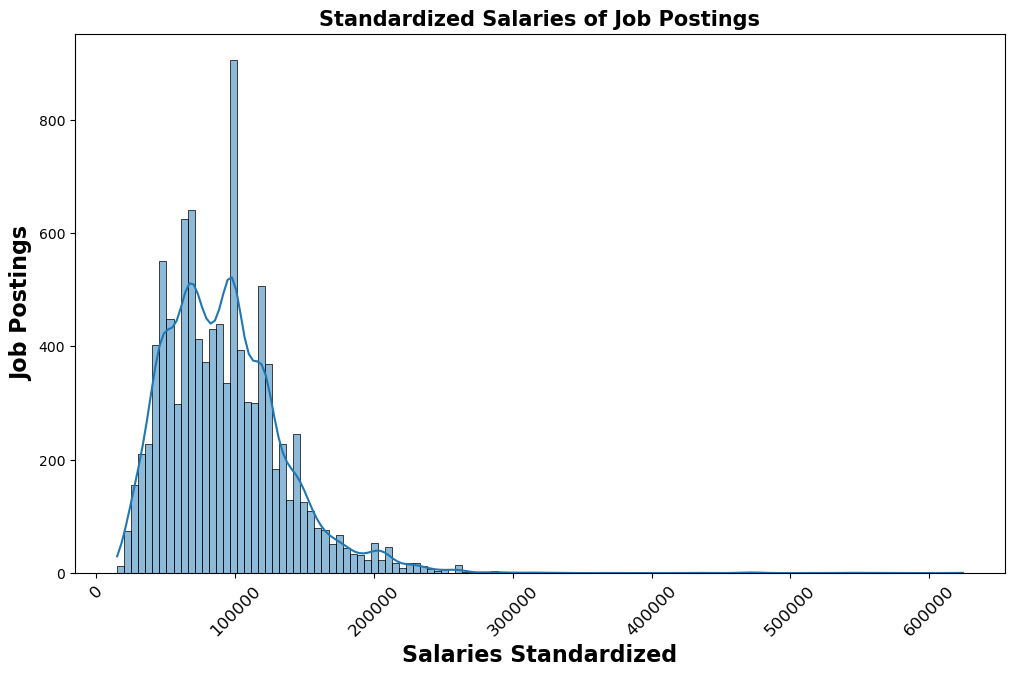

In [8]:
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='salary_standardized', kde=True)
plt.title('Standardized Salaries of Job Postings', weight='bold', fontsize=15)
plt.xlabel('Salaries Standardized', fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.ylabel('Job Postings', weight='bold', fontsize=16)
plt.show()

Around 100k USD is the most commmon salary amount.

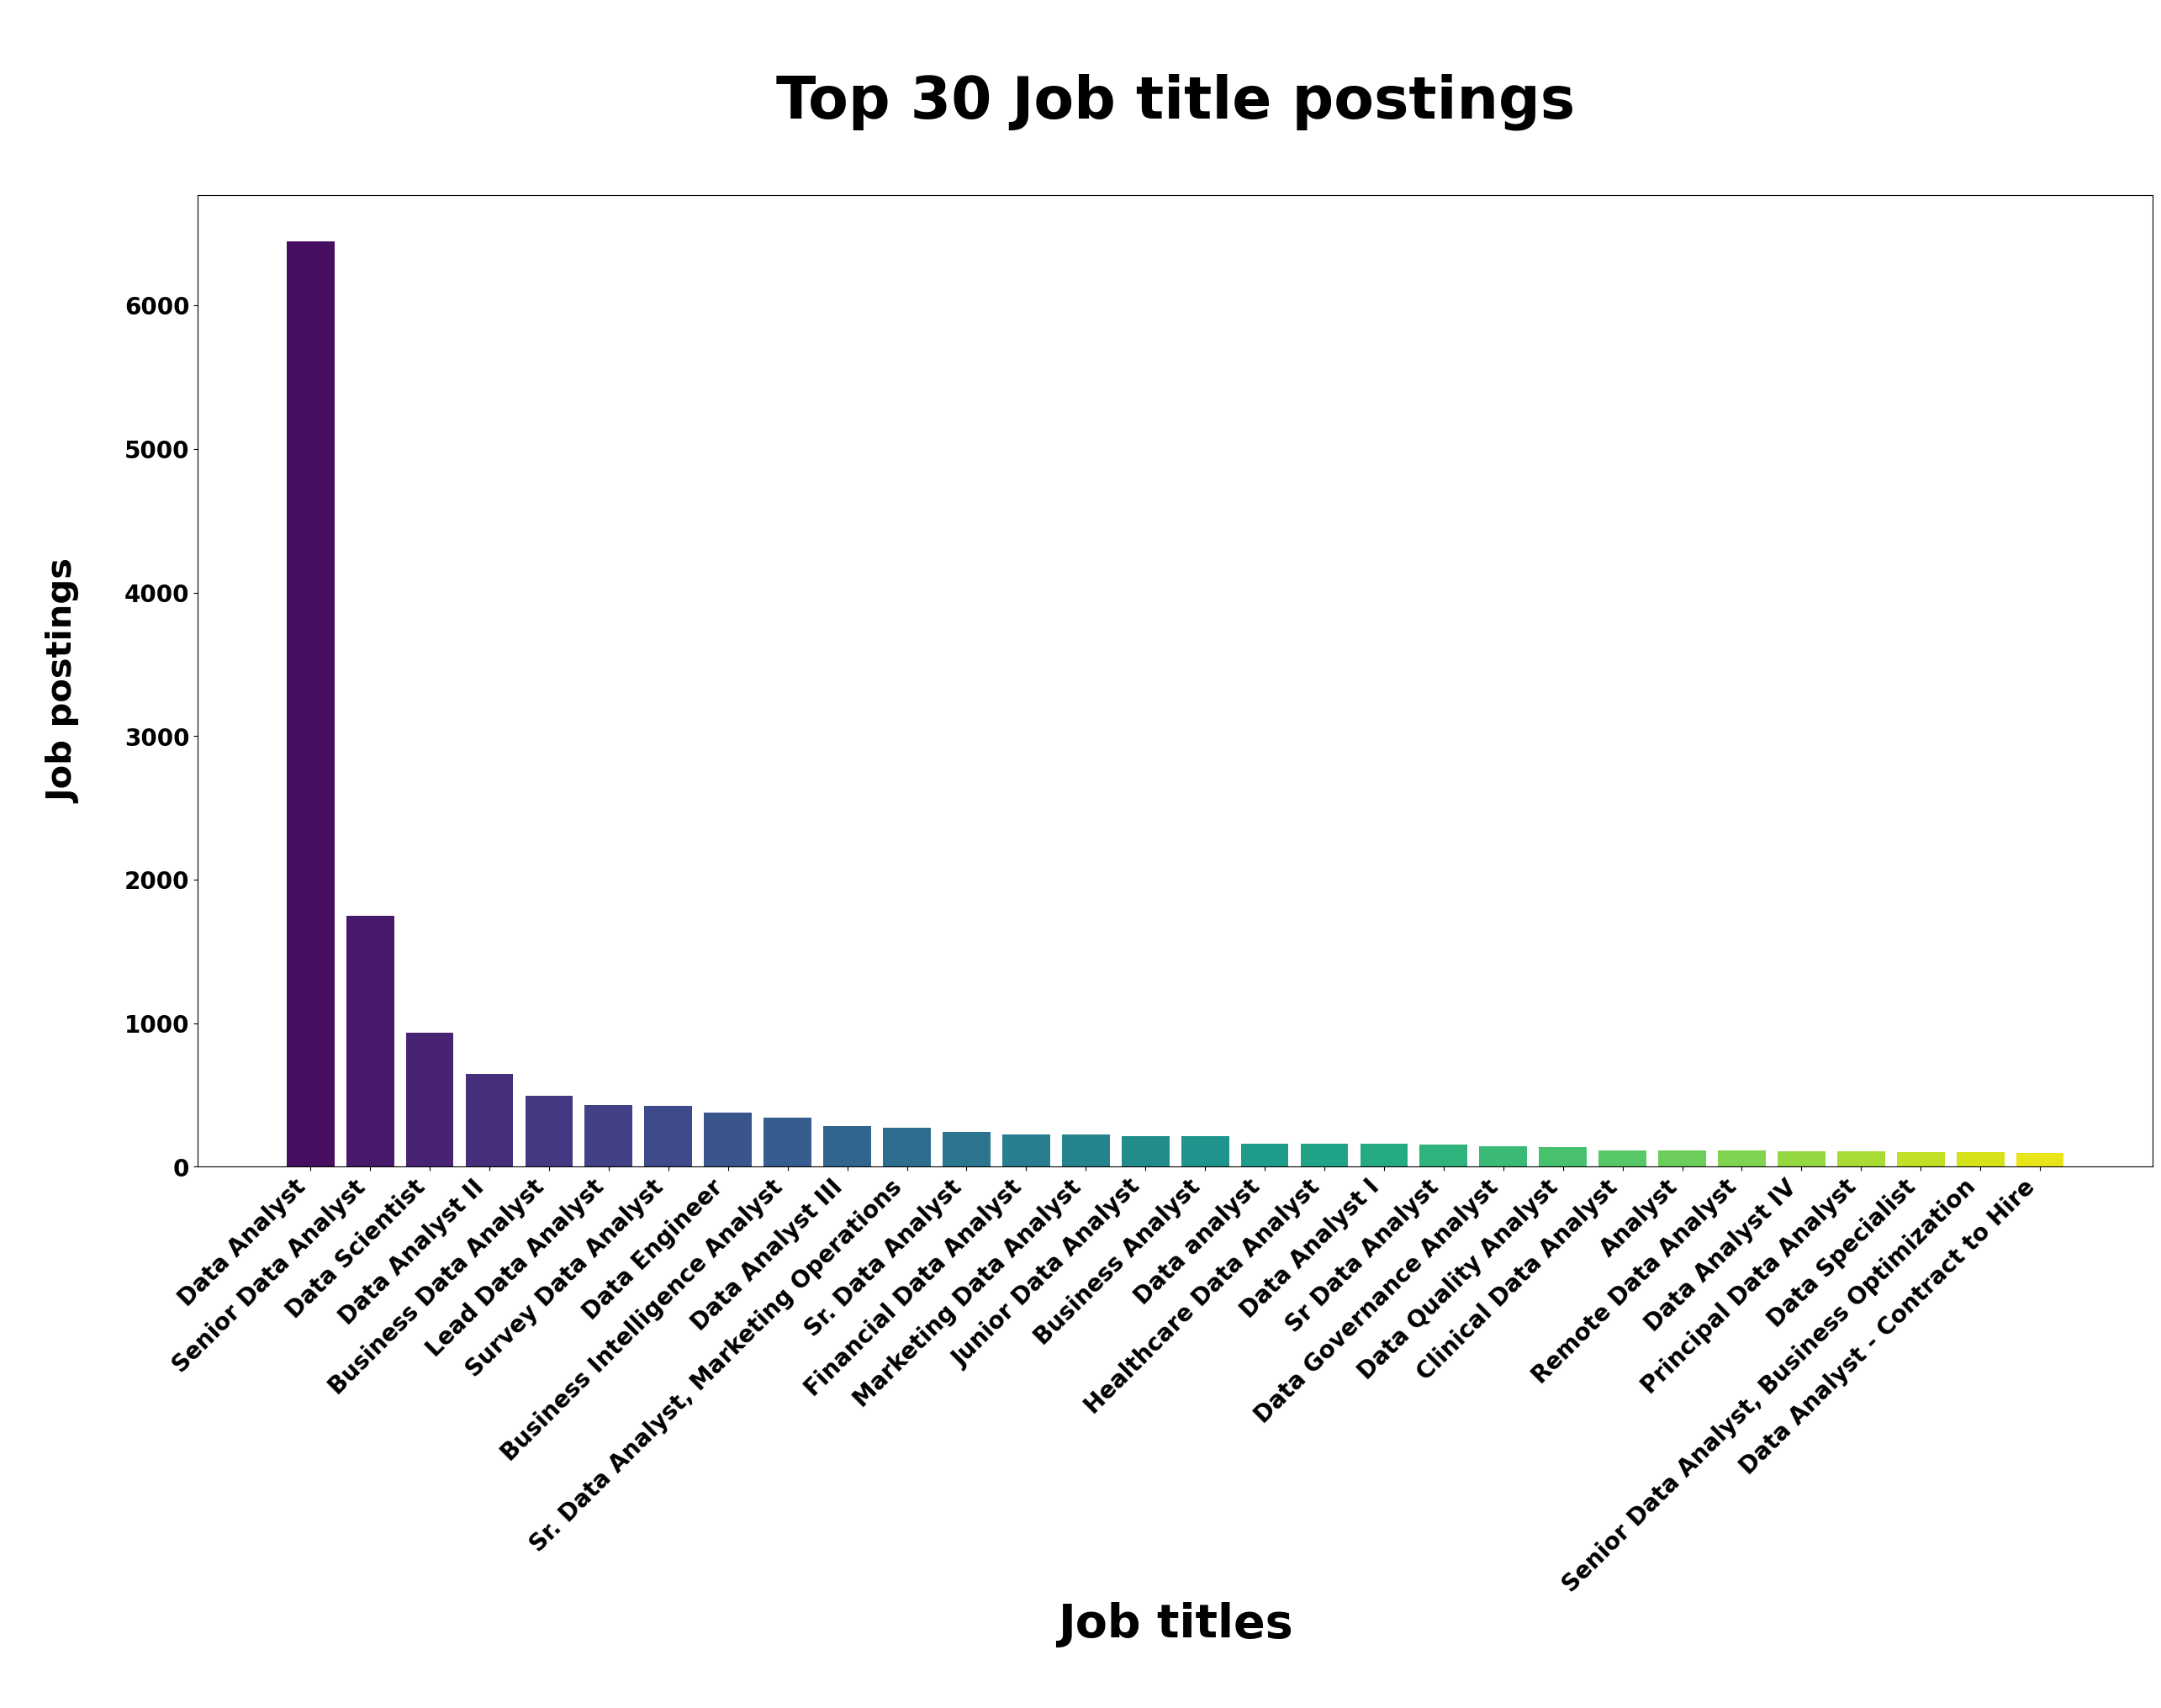

In [9]:
top_30_title = df['title'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_title))

plt.bar(top_30_title.index, top_30_title.values, color=colors1)
plt.title('\nTop 30 Job title postings\n', weight='bold', fontsize=50)
plt.xlabel('Job titles\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=20)
plt.ylabel('\nJob postings\n', weight='bold', fontsize=30)
plt.yticks(weight='bold', fontsize=20)
plt.show()

Data analyst dominates the job titles with many variations following such as business data analyst and survey data analyst. Data analyst repeats and this feature needs to be fixed.

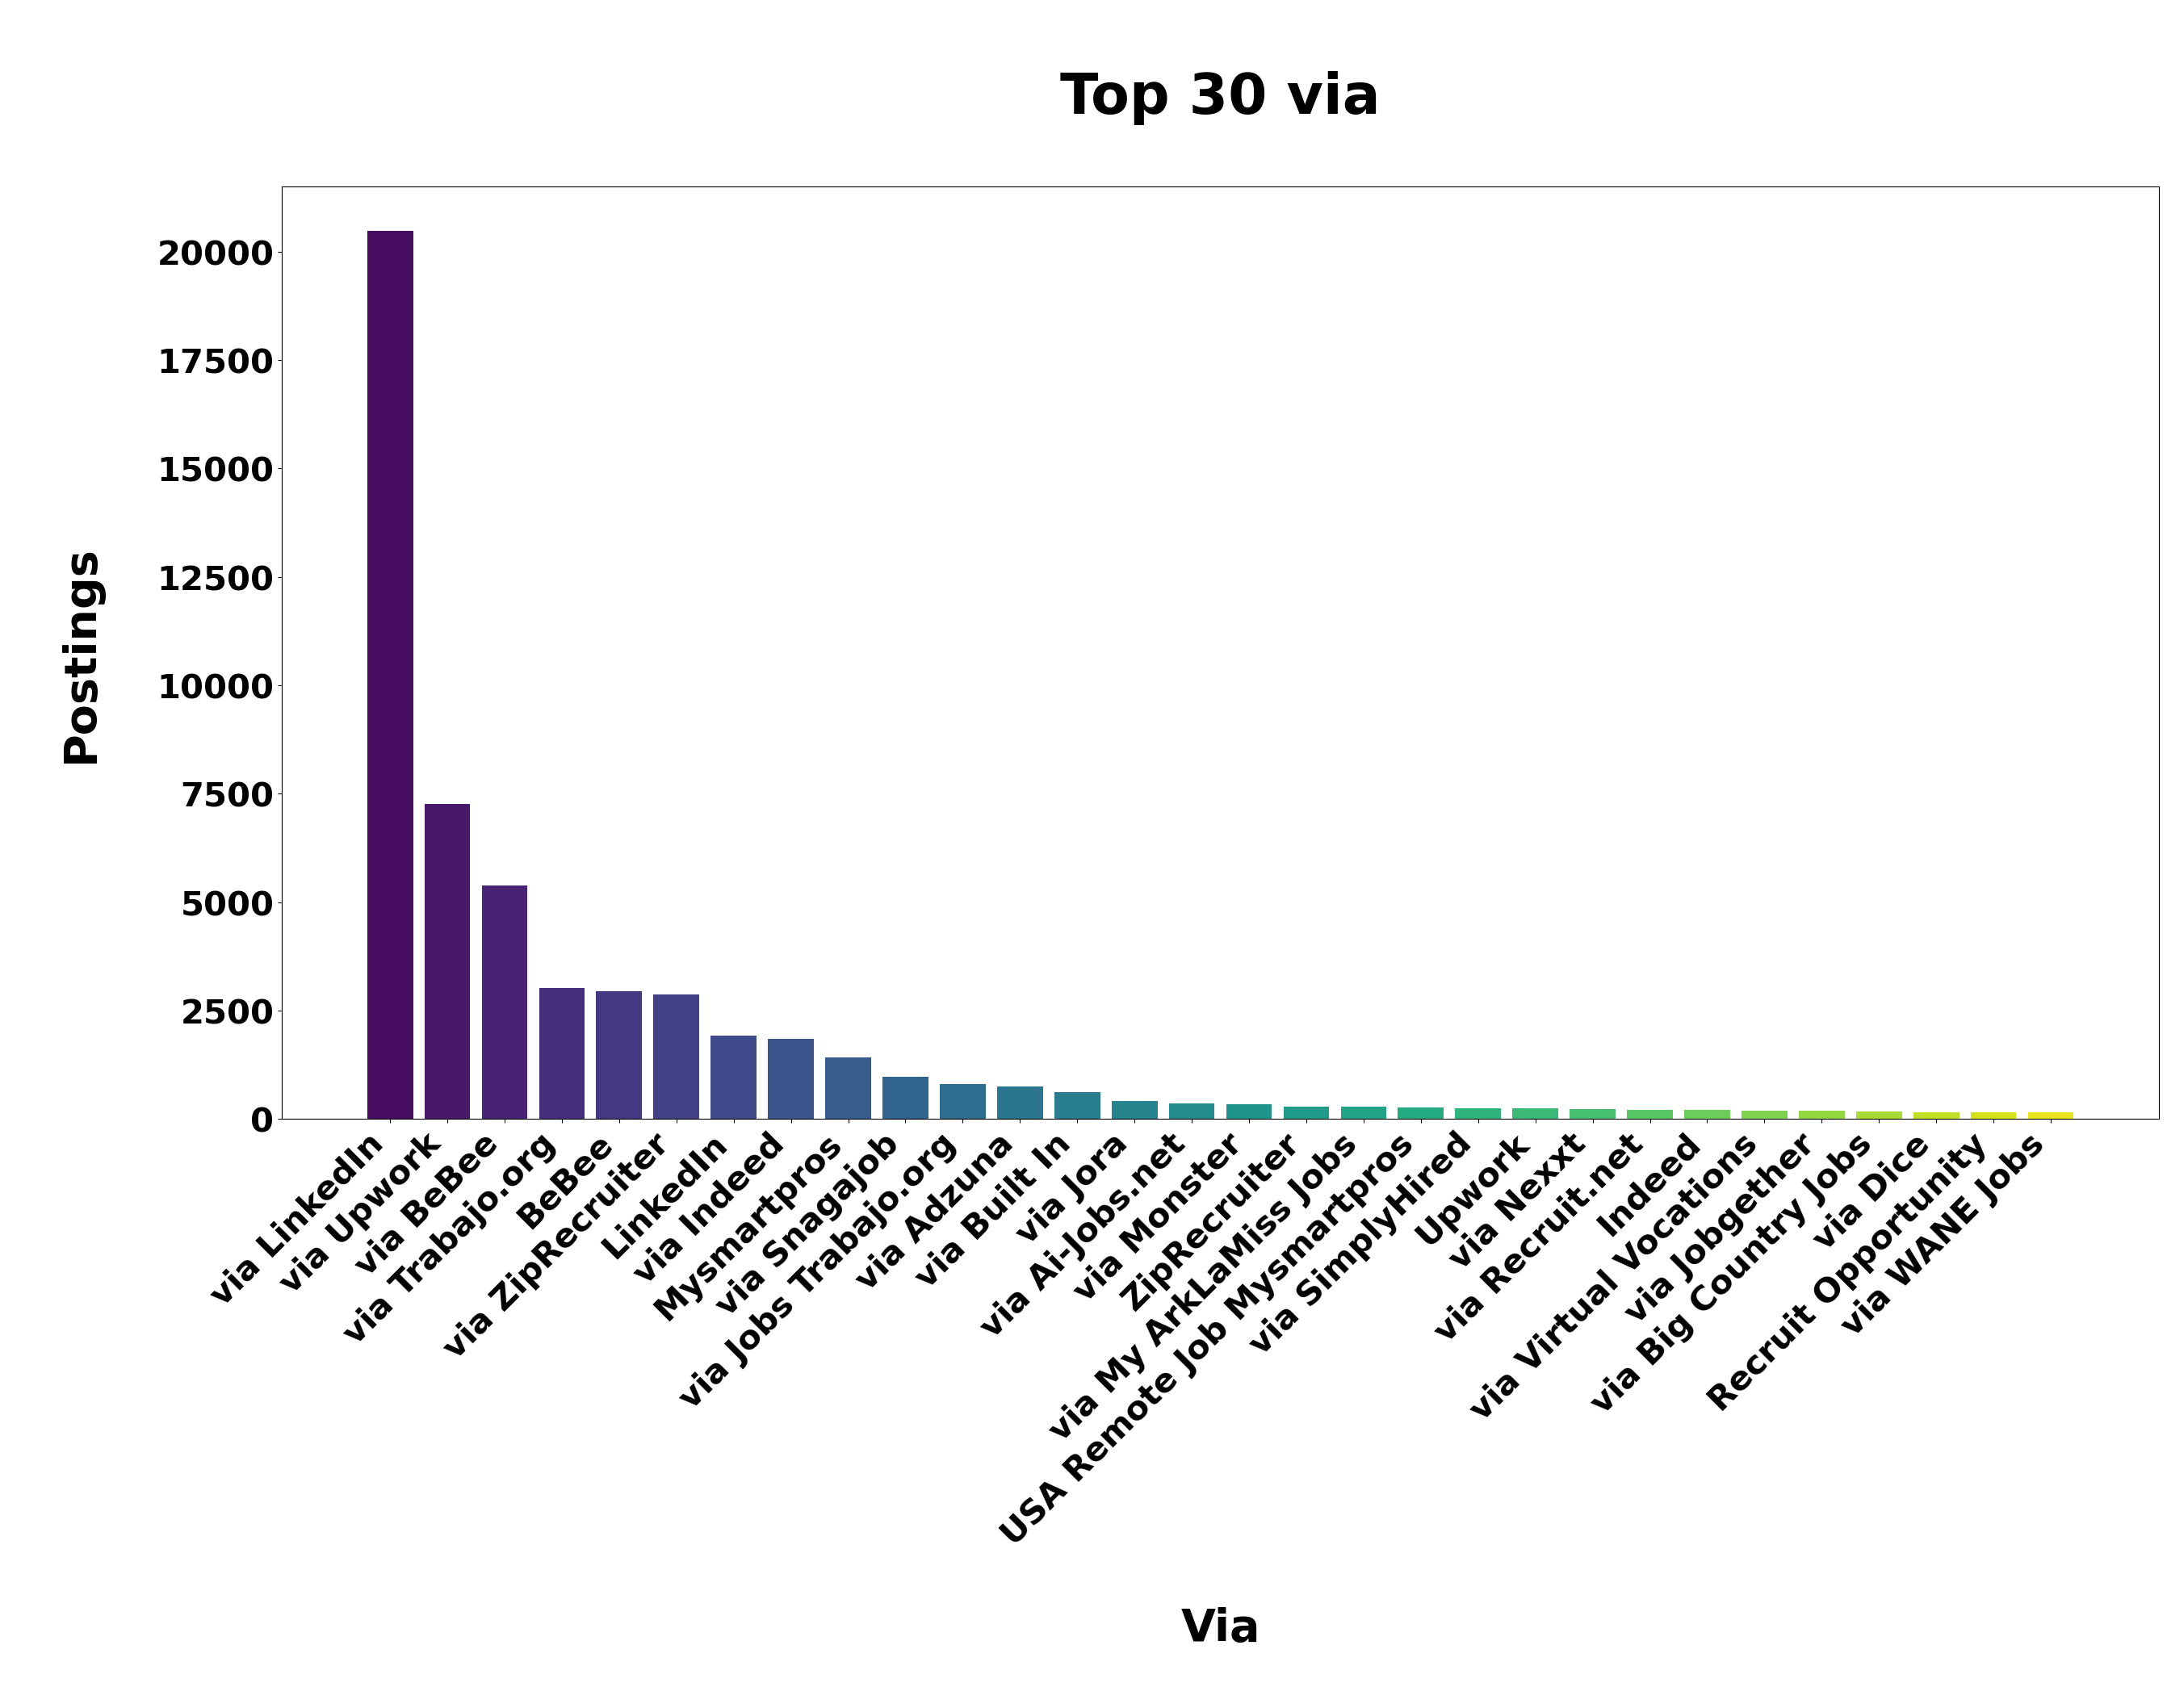

In [10]:
top_30_vias = df['via'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_vias))

plt.bar(top_30_vias.index, top_30_vias.values, color=colors1)
plt.title('\nTop 30 via\n', weight='bold', fontsize=50)
plt.xlabel('\nVia\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Most are by far via Linkedin and many sites seem to appear more than once such as via LinkedIn and then just LinkedIn are treated as if they were separate.

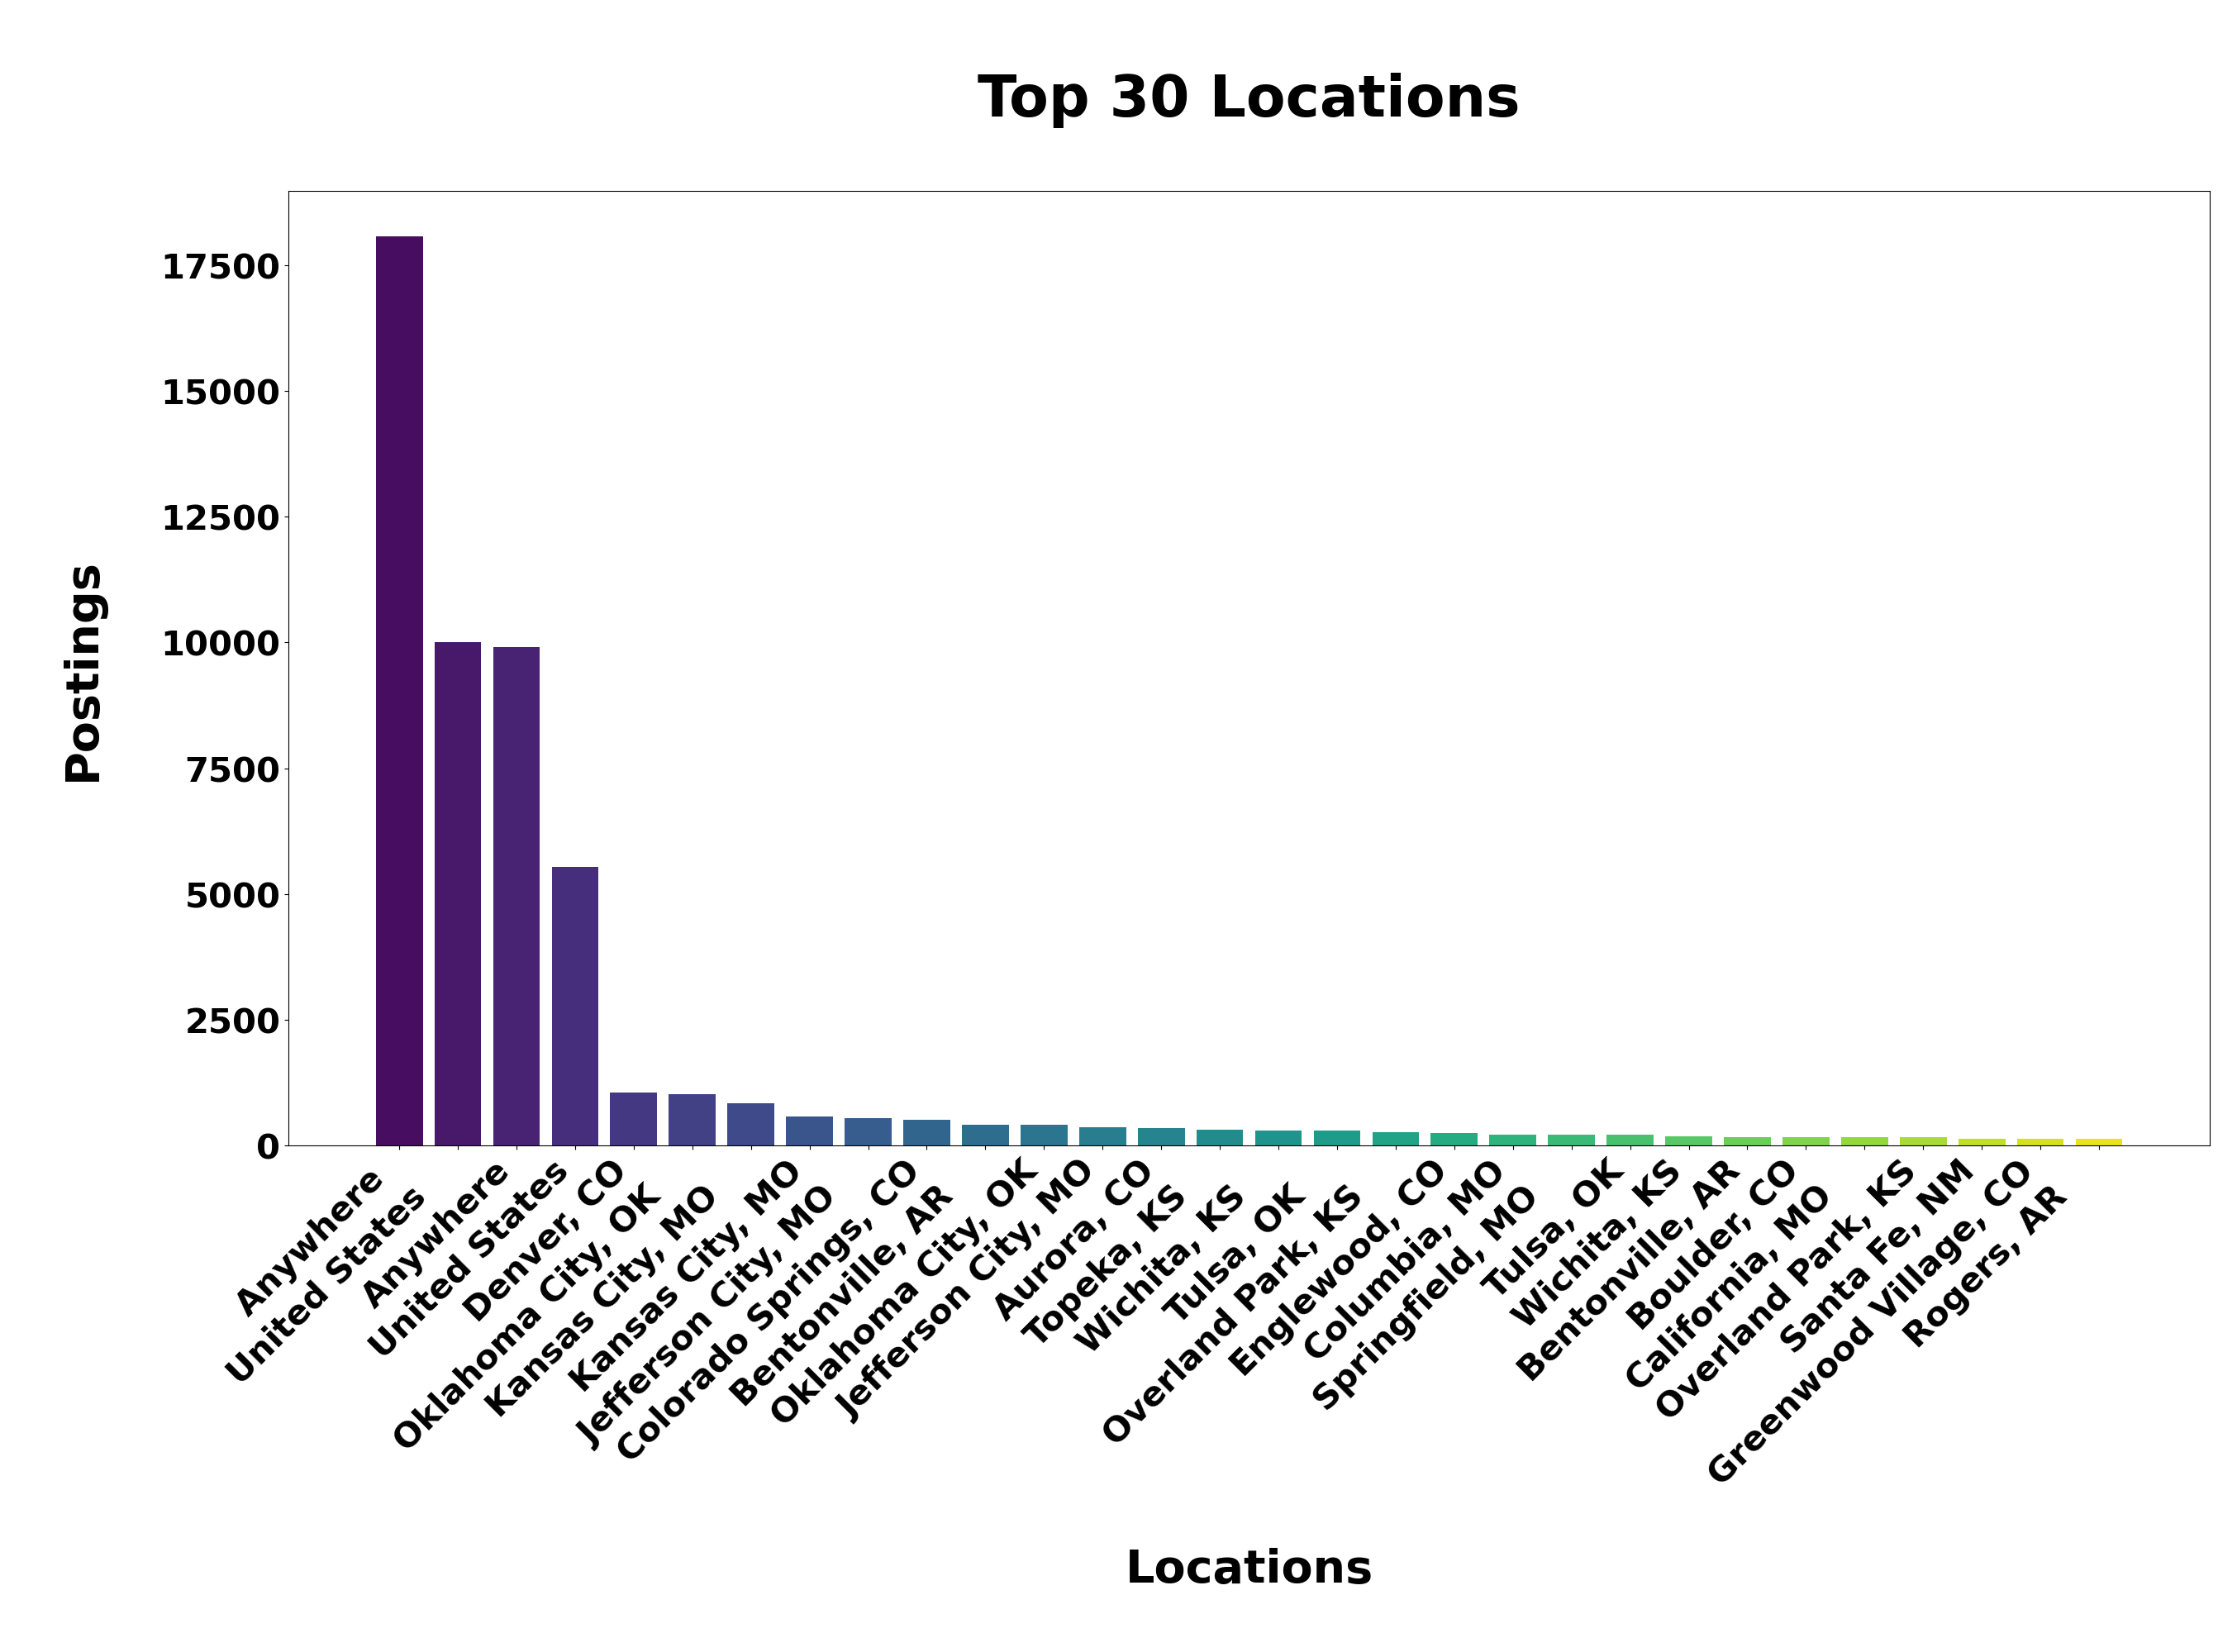

In [11]:
top_30_location = df['location'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_location))

plt.bar(top_30_location.index, top_30_location.values, color=colors1)
plt.title('\nTop 30 Locations\n', weight='bold', fontsize=50)
plt.xlabel('\nLocations\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Anywhere is number one, followed by United States. Anywhere is then number three, and then United States is again following at number four. It also seems very odd that the usual big cities such as NYC and San Francisco are not appearing in the top 30. These locations seemed biased towards the midwest.

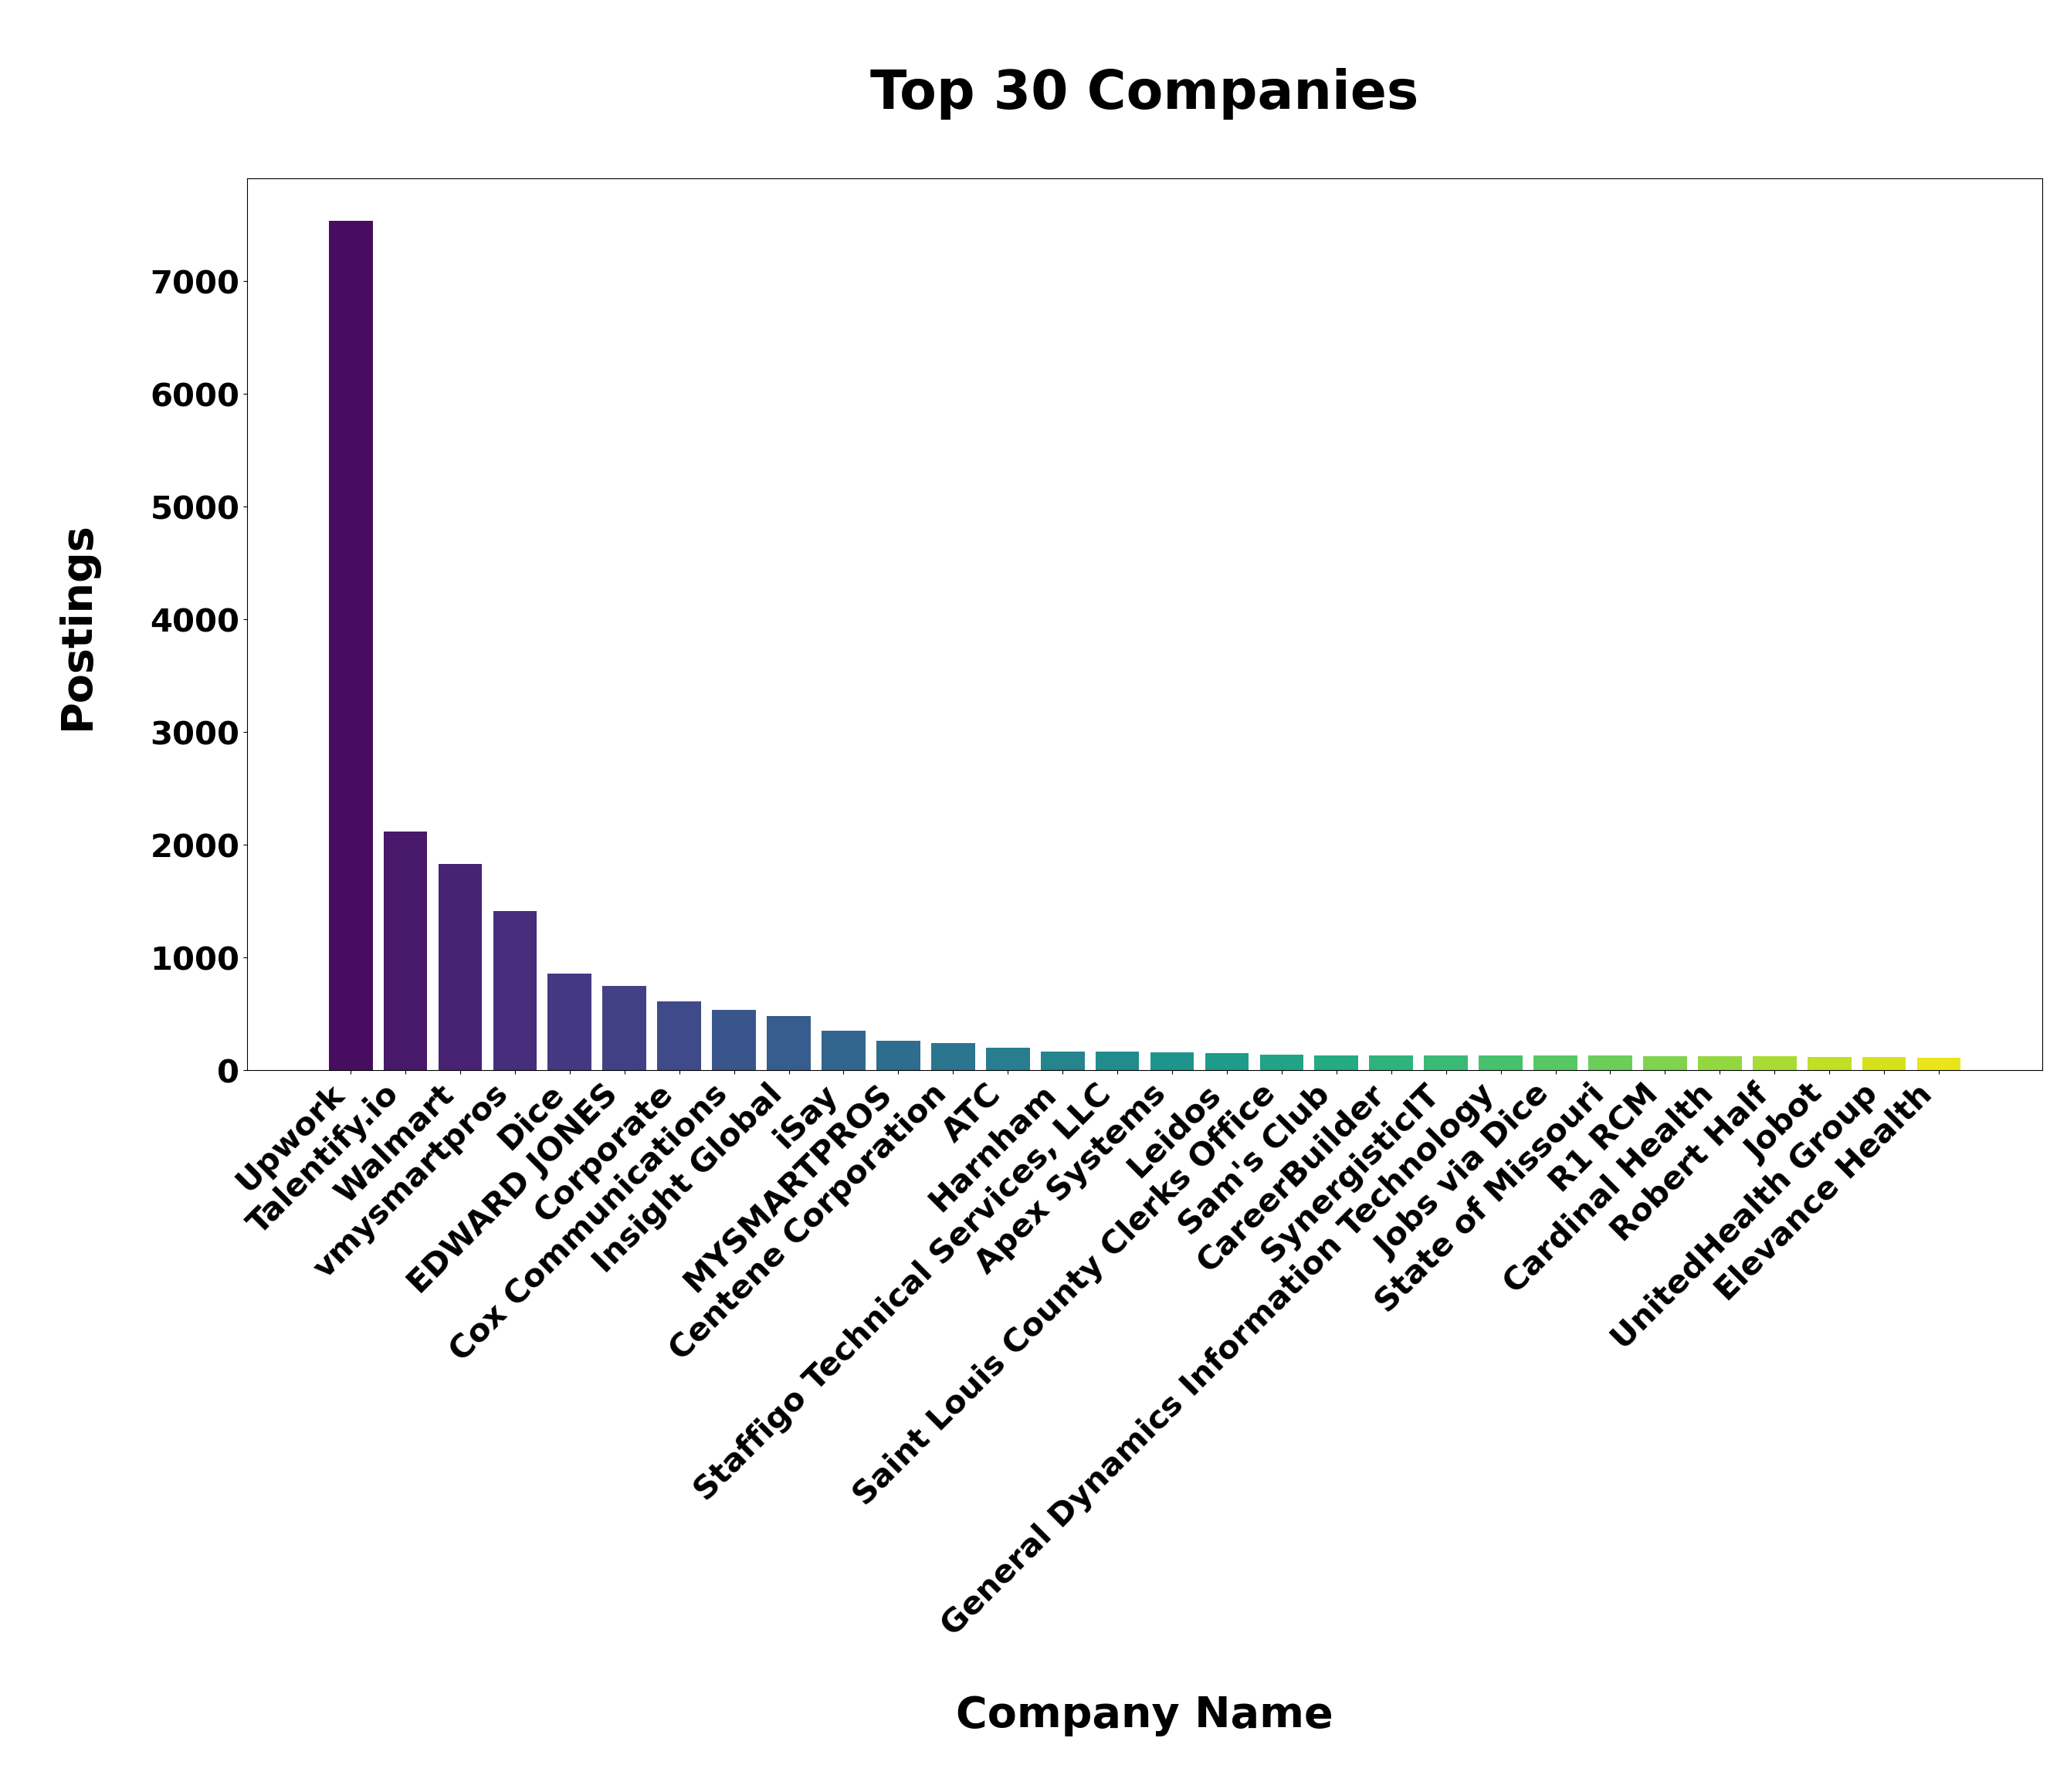

In [12]:
top_30_comp = df['company_name'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('viridis',len(top_30_comp))

plt.bar(top_30_comp.index, top_30_comp.values, color=colors1)
plt.title('\nTop 30 Companies\n', weight='bold', fontsize=50)
plt.xlabel('\nCompany Name\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Upwork is by far the most and Walmart is the biggest emplyer in many US states so no surprise it is number 3 here.

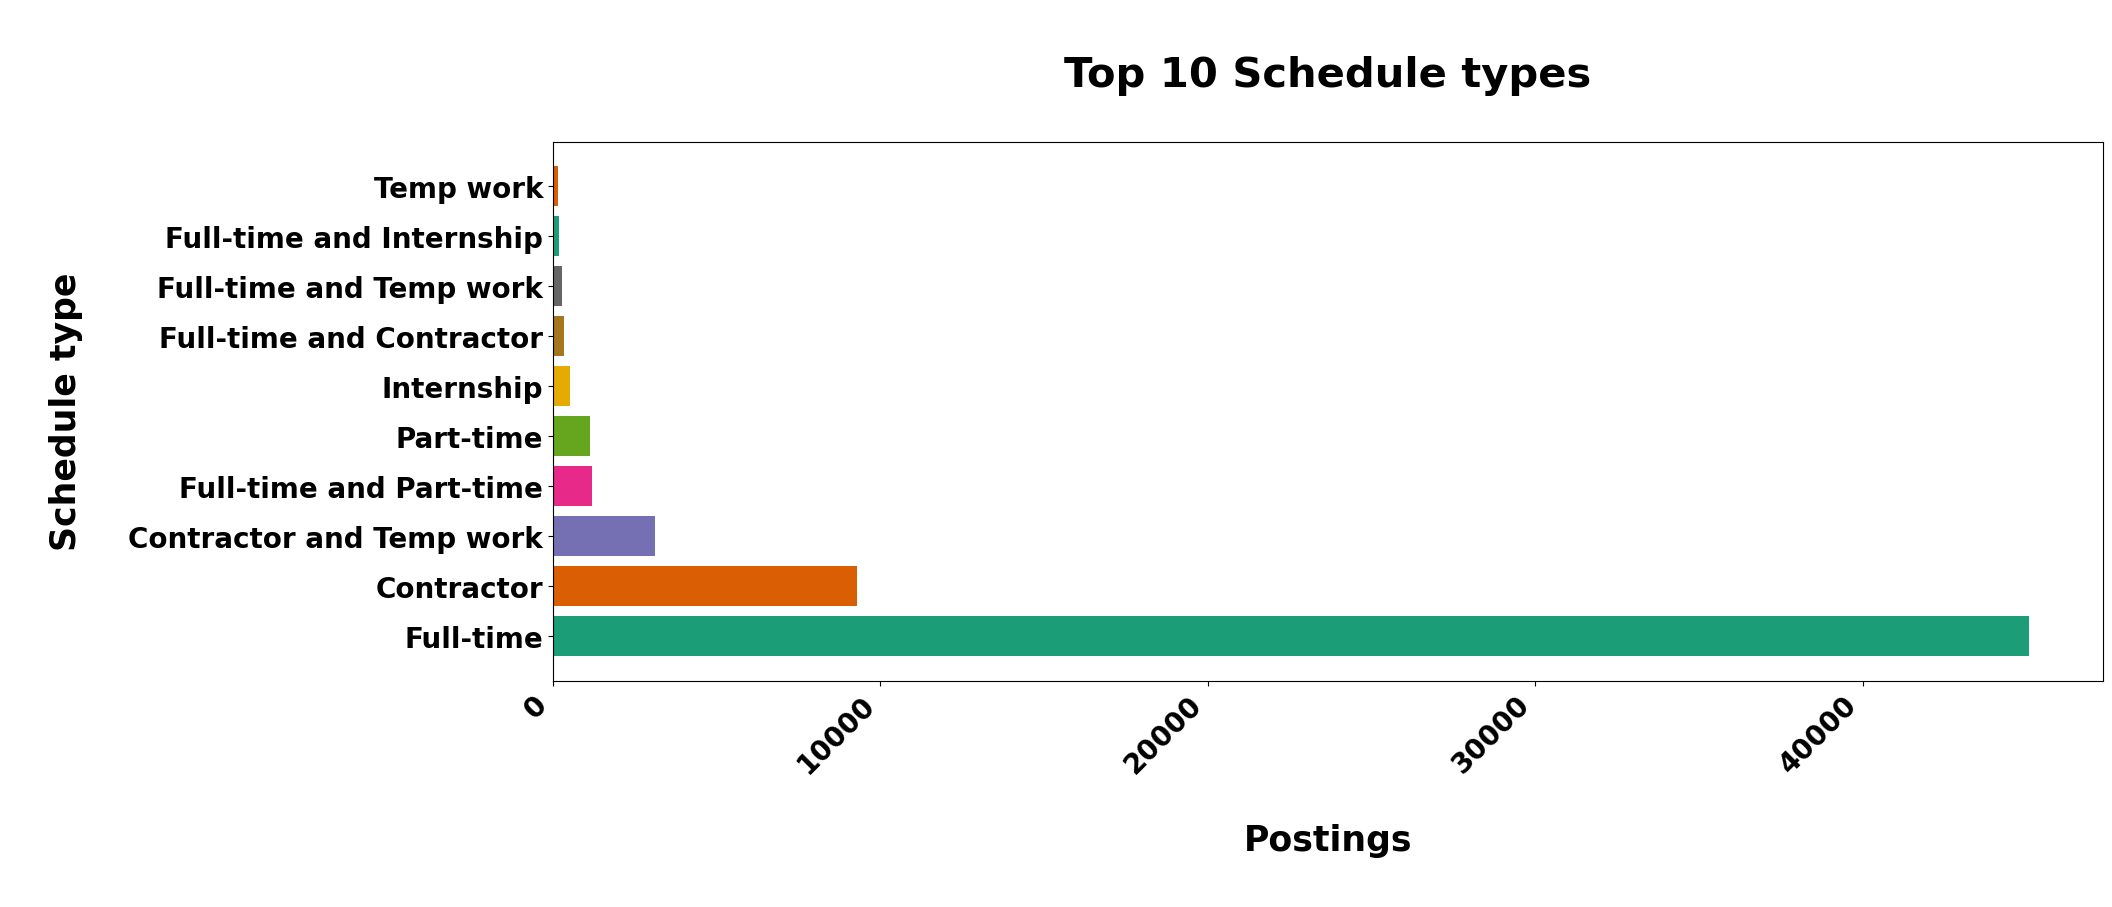

In [13]:
top_10_schedule = df['schedule_type'].value_counts().head(10)
plt.figure(figsize=(20, 7))
colors1 = sns.color_palette('Dark2',len(top_10_schedule))

plt.barh(top_10_schedule.index, top_10_schedule.values, color=colors1)
plt.title('\nTop 10 Schedule types\n', weight='bold', fontsize=30)
plt.xlabel('\nPostings\n', weight='bold', fontsize=25)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=20)
plt.ylabel('\nSchedule type\n', weight='bold', fontsize=25)
plt.yticks(weight='bold', fontsize=20)
plt.show()

Full time dominates and everything after part-time hardly appears in the dataset. There are many other schedule types but they hardly appear in the dataset at all.

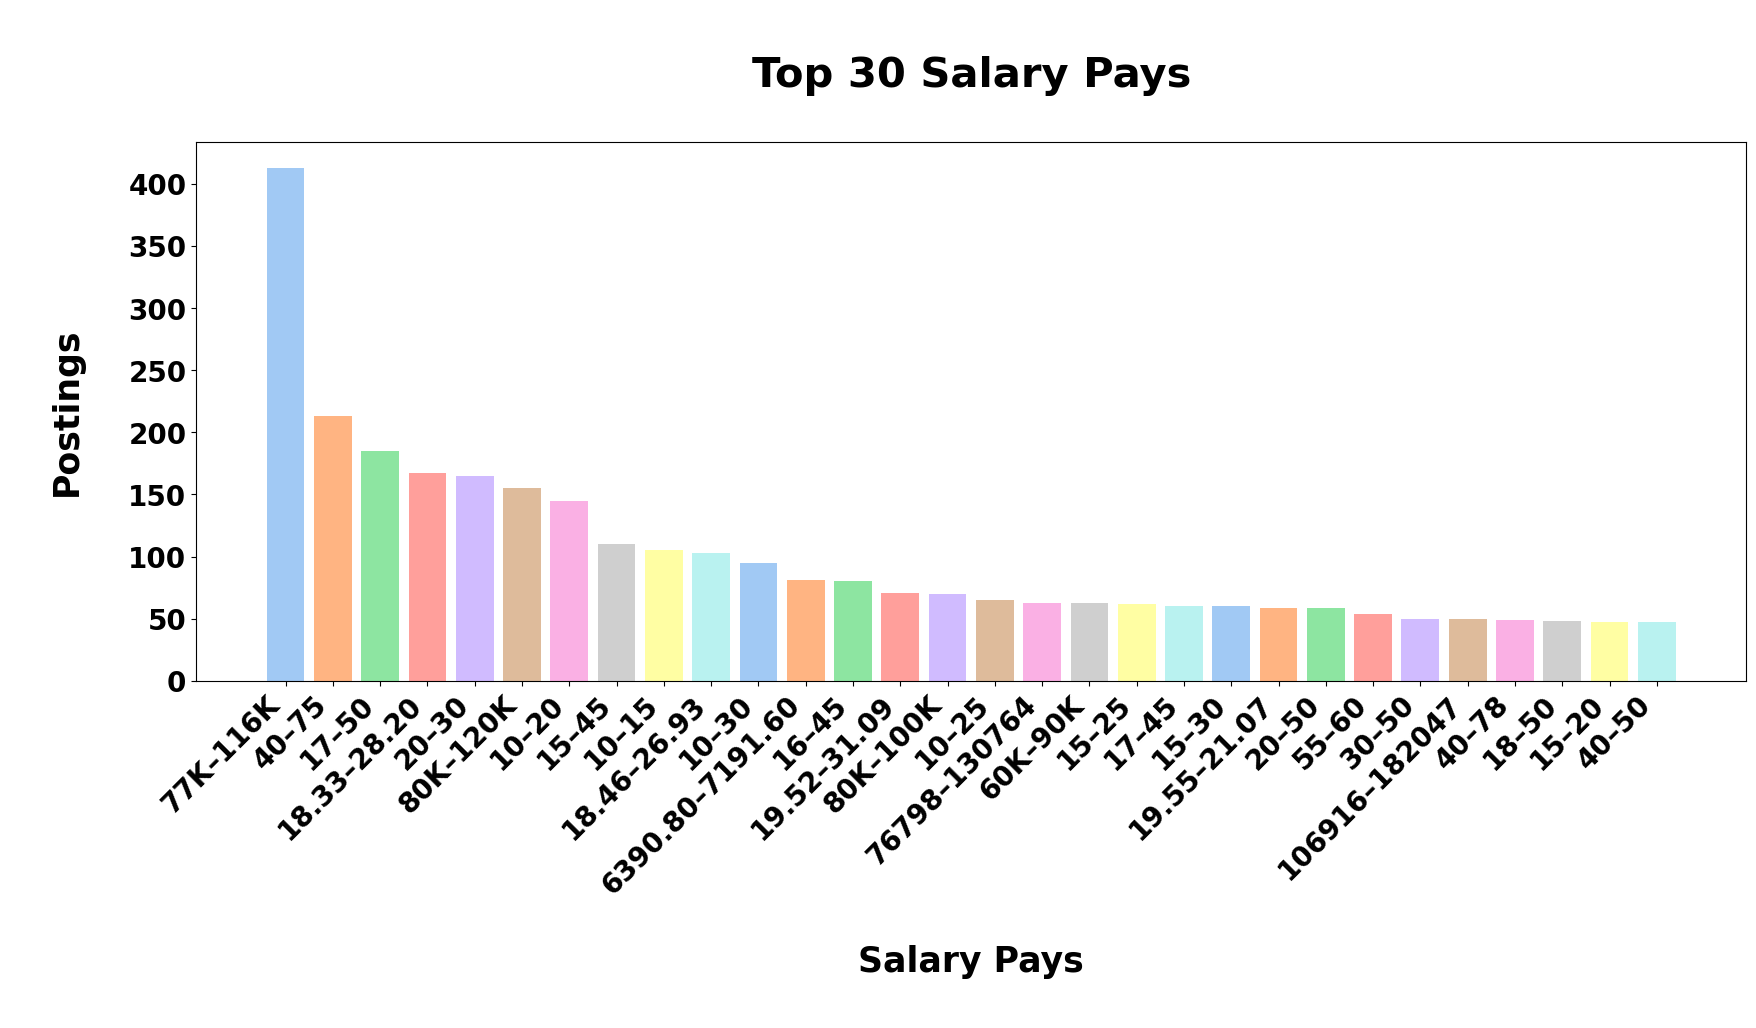

In [14]:
top_10_comps = df['salary_pay'].value_counts().head(30)
plt.figure(figsize=(20, 7))
colors1 = sns.color_palette('pastel',len(top_10_schedule))

plt.bar(top_10_comps.index, top_10_comps.values, color=colors1)
plt.title('\nTop 30 Salary Pays\n', weight='bold', fontsize=30)
plt.xlabel('\nSalary Pays\n', weight='bold', fontsize=25)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=20)
plt.ylabel('\nPostings\n', weight='bold', fontsize=25)
plt.yticks(weight='bold', fontsize=20)
plt.show()

Unstandardized and all over the place, there are features that cover this topics as well anyways, so this may be dropped

<function matplotlib.pyplot.show(close=None, block=None)>

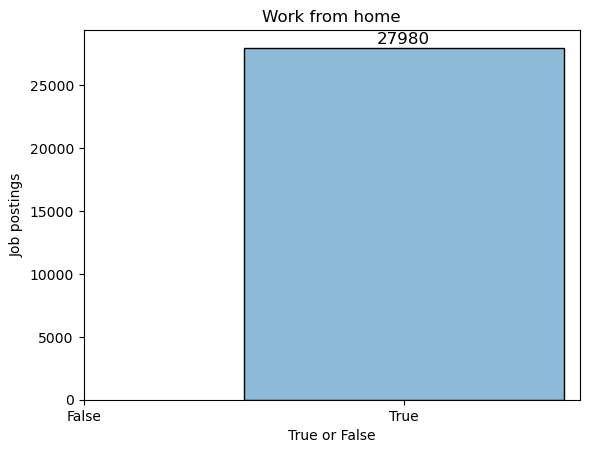

In [15]:
ax = sns.histplot(data=df, x='work_from_home', kde=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=1)

plt.title('Work from home')
plt.xlabel('True or False')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.ylabel('Job postings')
plt.show

A deceptive graph, it appears that work from home has no falses but it is actually because the other option is actually null. Null can either mean flse or bad data, I don't have the information based on the dataset given.

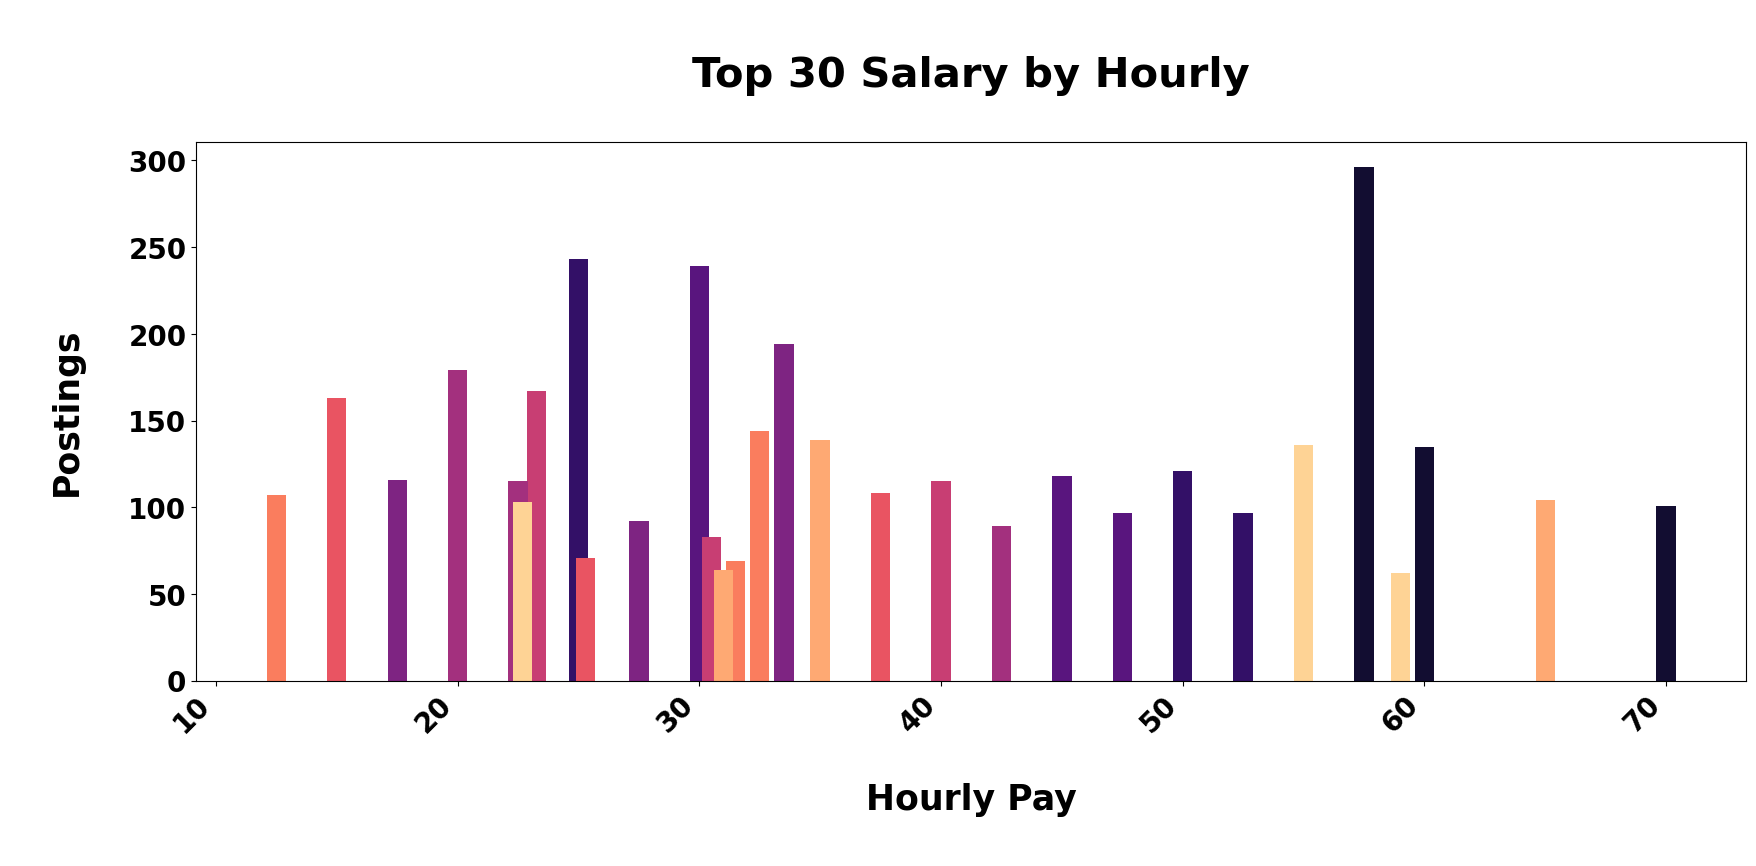

In [16]:
top_10_hr = df['salary_hourly'].value_counts().head(30)
plt.figure(figsize=(20, 7))
colors1 = sns.color_palette('magma',len(top_10_schedule))

plt.bar(top_10_hr.index, top_10_hr.values, color=colors1)
plt.title('\nTop 30 Salary by Hourly\n', weight='bold', fontsize=30)
plt.xlabel('\nHourly Pay\n', weight='bold', fontsize=25)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=20)
plt.ylabel('\nPostings\n', weight='bold', fontsize=25)
plt.yticks(weight='bold', fontsize=20)
plt.show()

Just under 60 USD per hour is the most common followed by the mid 20s.

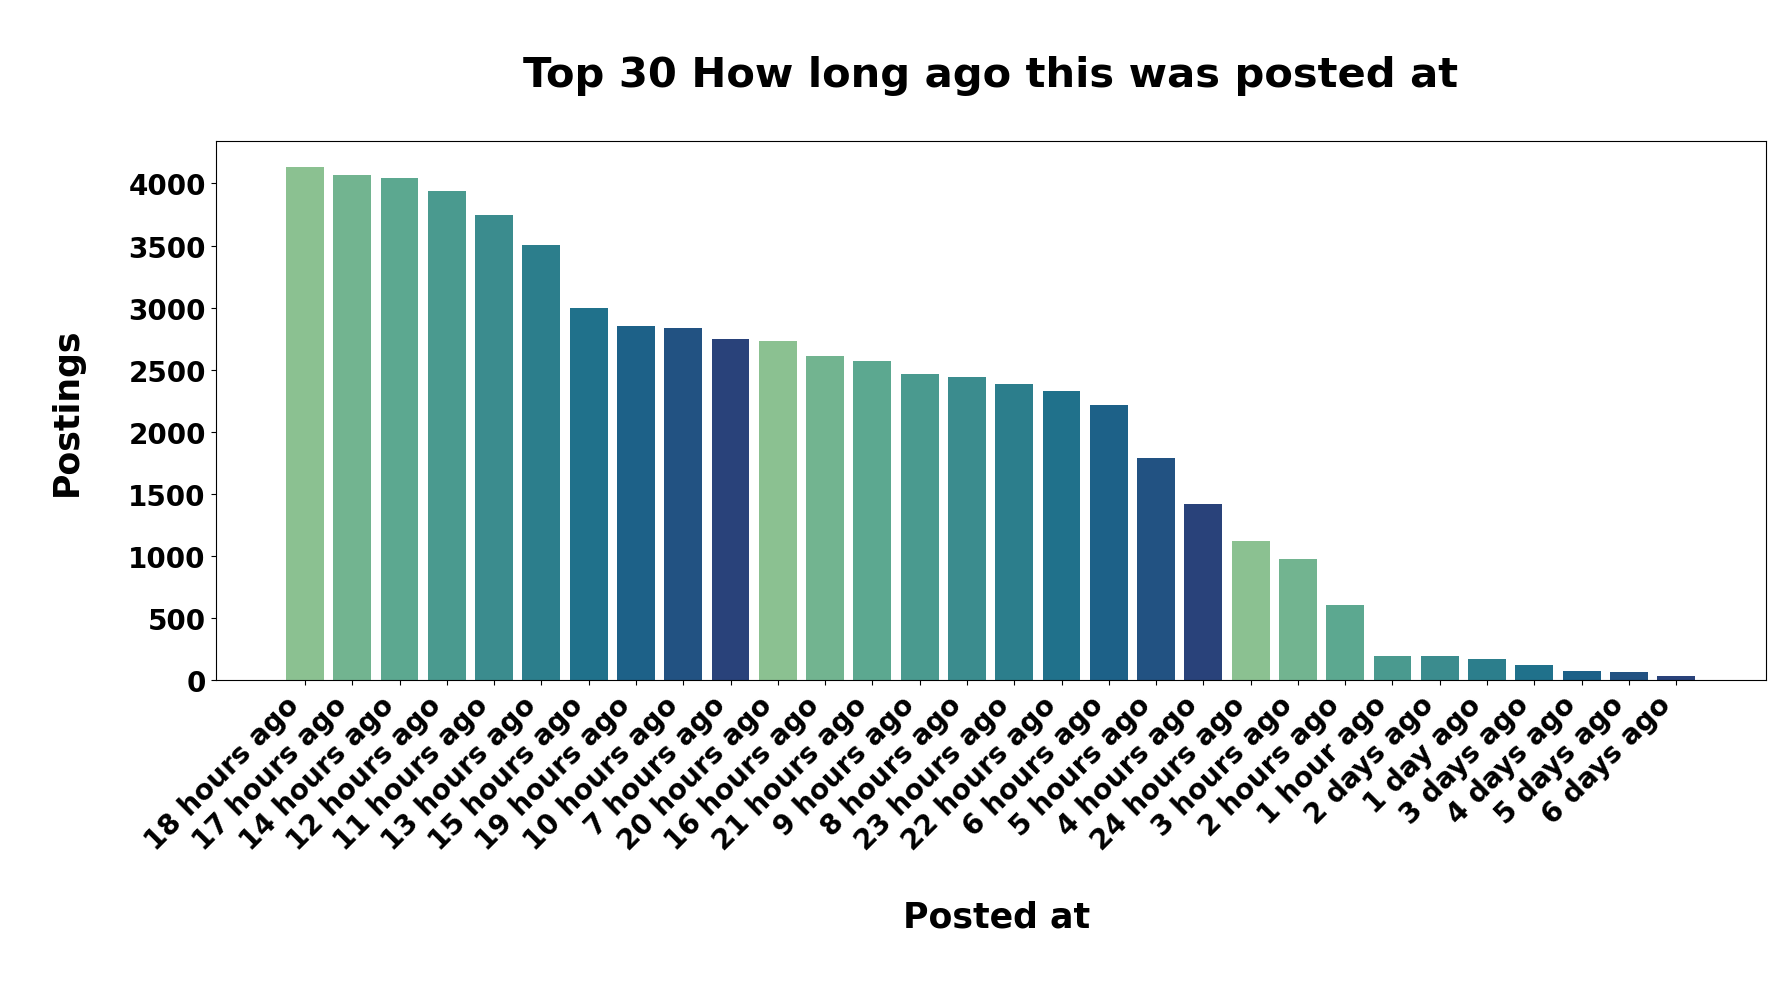

In [17]:
top_10_post = df['posted_at'].value_counts().head(30)
plt.figure(figsize=(20, 7))
colors1 = sns.color_palette('crest',len(top_10_schedule))

plt.bar(top_10_post.index, top_10_post.values, color=colors1)
plt.title('\nTop 30 How long ago this was posted at\n', weight='bold', fontsize=30)
plt.xlabel('\n Posted at\n', weight='bold', fontsize=25)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=20)
plt.ylabel('\nPostings\n', weight='bold', fontsize=25)
plt.yticks(weight='bold', fontsize=20)
plt.show()

A little more than half a day are the most common and the older ones are the least common here.

This information can vary greatly the next time this dataset is pulled and updated.

# Standardizing Columns

In [18]:
# function for standardizing job titles
def normalize_title(title):
    title = title.lower() # makes lowercase
    title = re.sub(r'(sr\.?|senior)', 'senior', title) # standardize senior
    title = re.sub(r'(jr\.?|junior)', 'junior', title) # standardize junior
    title = re.sub(r'\s*-\s*.*$', '', title) # removes suffices like '-contract to hire'
    title = re.sub(r'[^\w\s]', '', title) # removes punctiation
    title = title.strip()
    return title

In [19]:
df['title'] = df['title'].apply(normalize_title)

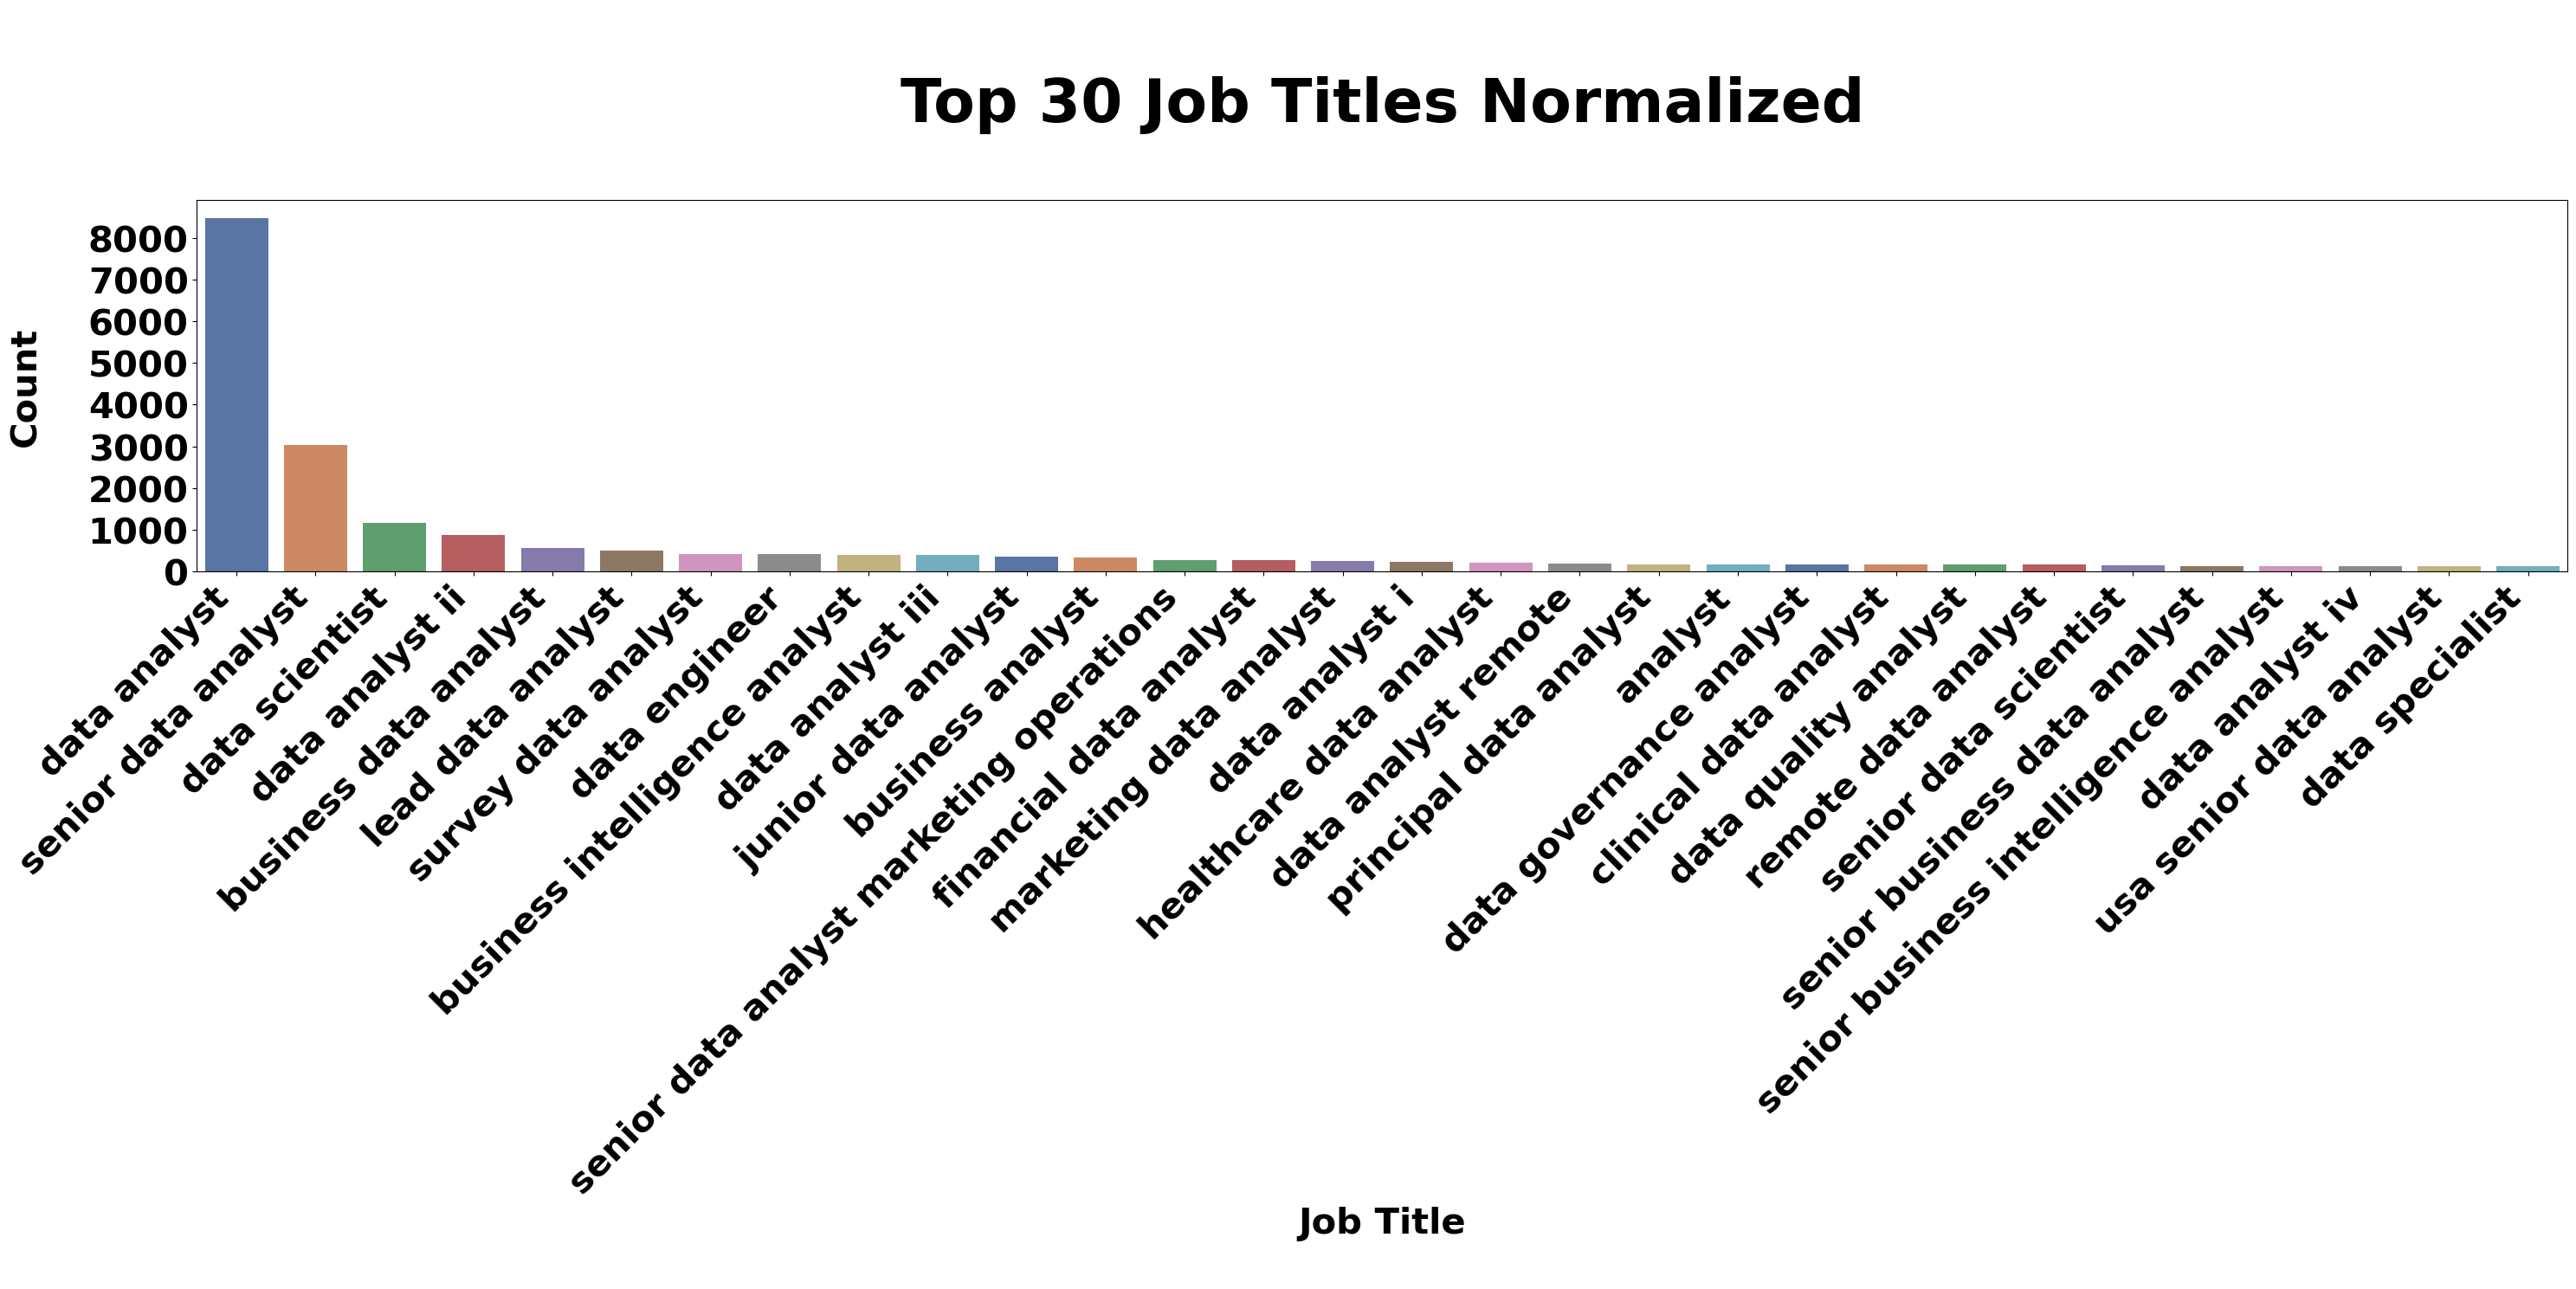

In [20]:
title_counts = df['title'].value_counts().head(30)

plt.figure(figsize=(30, 15))
sns.barplot(x=title_counts.index, y=title_counts.values, hue=title_counts.index, palette='deep')
plt.xticks(rotation=45, ha='right')
plt.title('\nTop 30 Job Titles Normalized\n', weight='bold', fontsize=50)
plt.xlabel('Job Title\n', weight='bold', fontsize=30)
plt.xticks(weight='bold', fontsize=30)
plt.ylabel('Count\n', weight='bold', fontsize=30)
plt.yticks(weight='bold', fontsize=30)
plt.tight_layout()
plt.show()


All letters are now lowercase in order to combine job titles such as "Data Analyst" and "Data analyst" together. The other titles like "data analyst ii" and "data analyst iv" are not being combined here. Although they may be the same jobs, they are being kept separate in order to differentiate between experience level, pay, and other potential factors.

In [21]:
df['location'] = df['location'].str.strip()

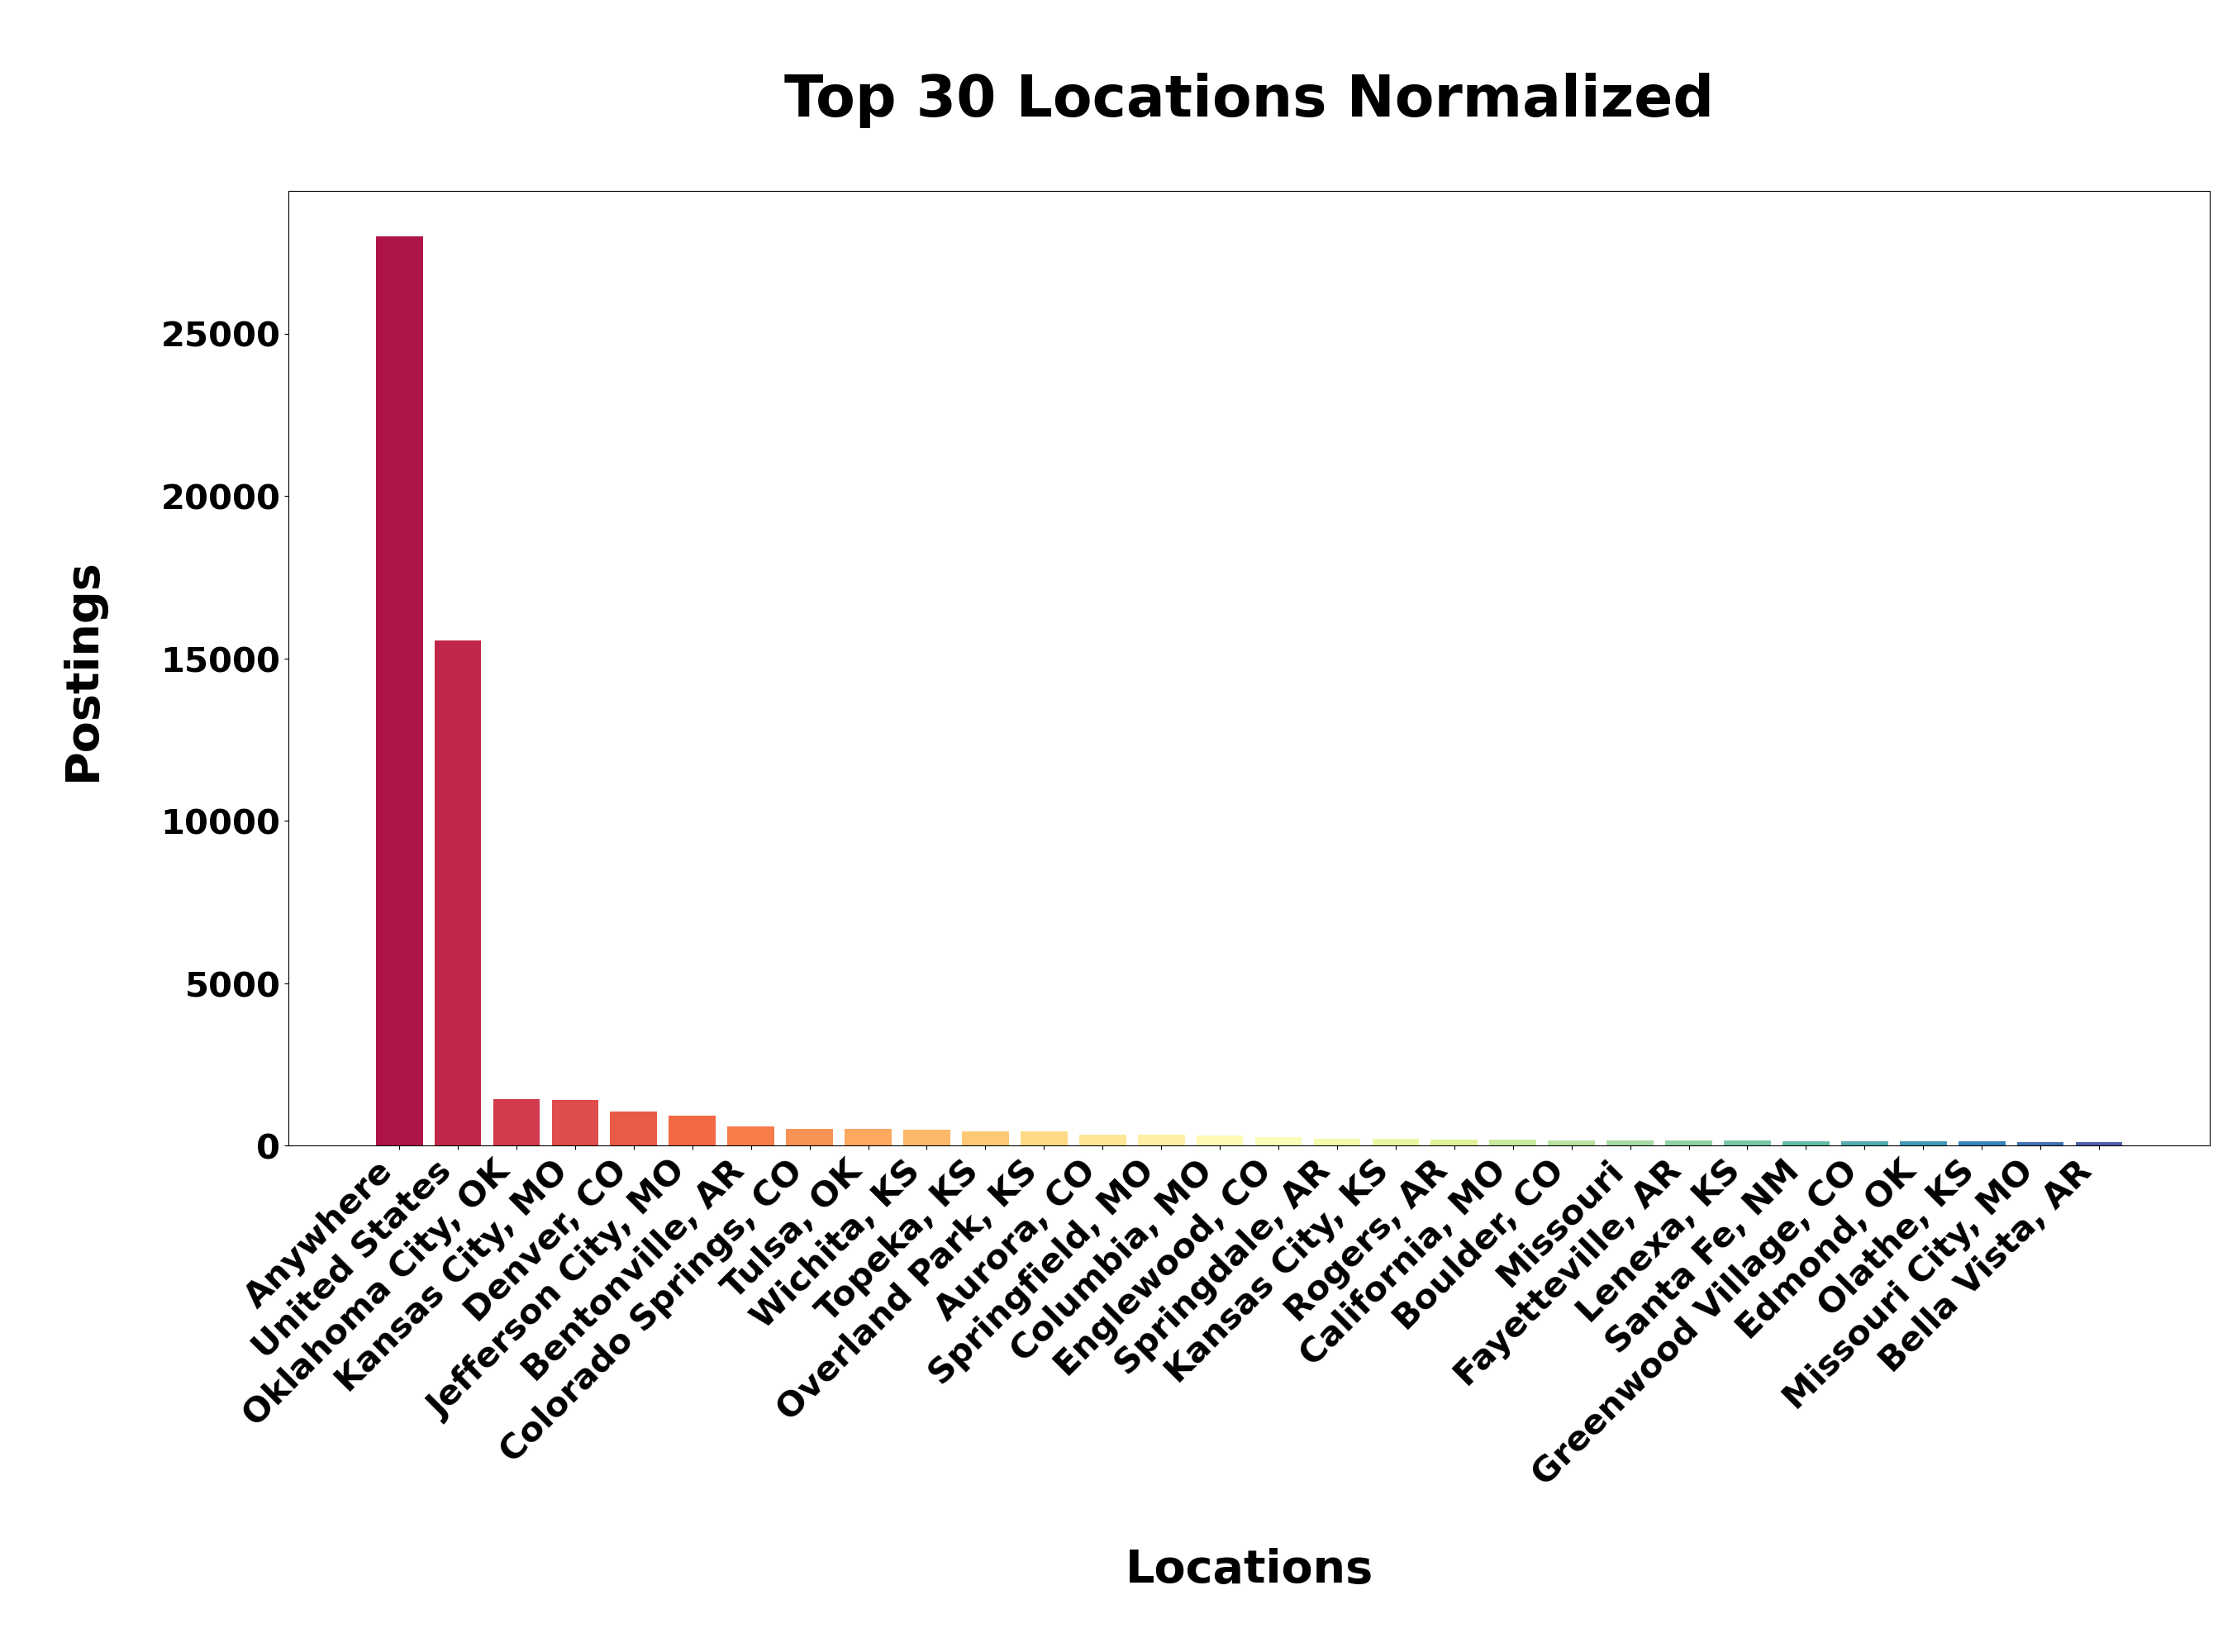

In [22]:
top_30_location = df['location'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors1 = sns.color_palette('Spectral',len(top_30_location))

plt.bar(top_30_location.index, top_30_location.values, color=colors1)
plt.title('\nTop 30 Locations Normalized\n', weight='bold', fontsize=50)
plt.xlabel('\nLocations\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

Whitespace was stripped away around the words since "Anywhere" and "Anywhere " were being considered different. These were normalized since they are obviously the same thing. Some locations have changed slightly on the list of top 30, however NYC and other expected locations still didn't appear. 

In [23]:
df['via'] = df['via'].str.replace(r'^via\s+', '', regex=True).str.strip()

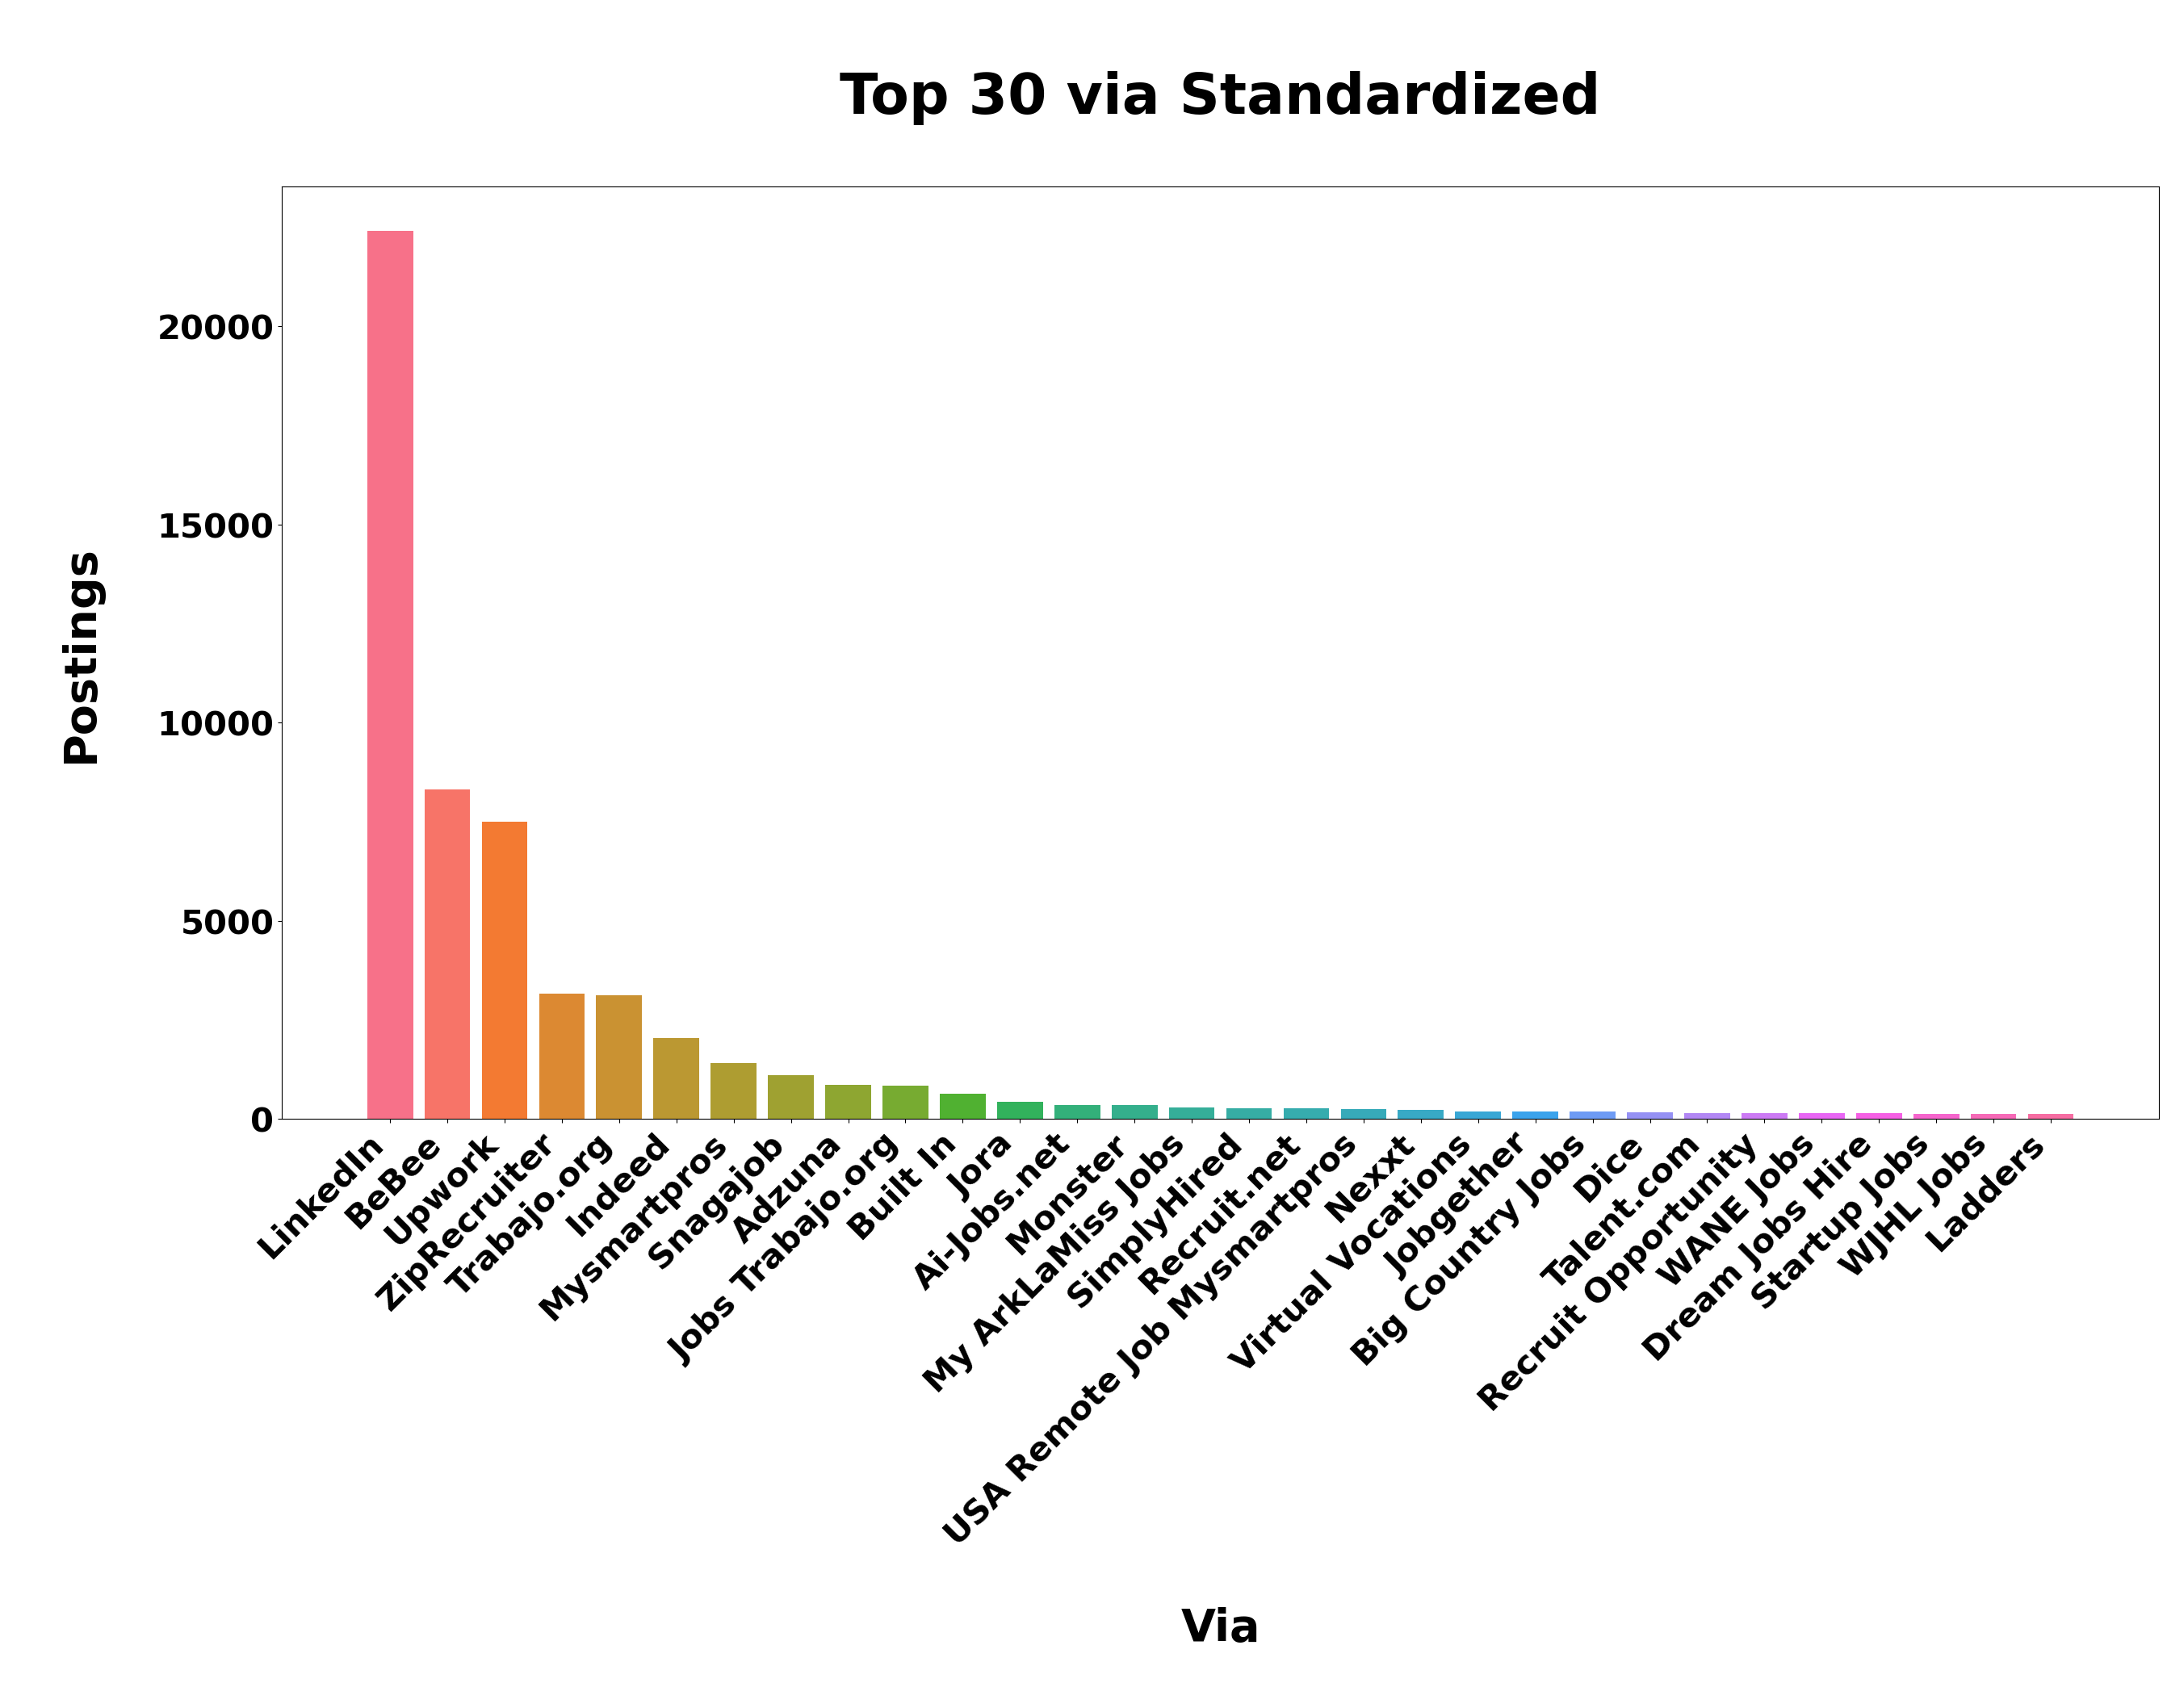

In [24]:
top_30_vias = df['via'].value_counts().head(30)
plt.figure(figsize=(30, 15))
colors2 = sns.color_palette('husl',len(top_30_vias))

plt.bar(top_30_vias.index, top_30_vias.values, color=colors2)
plt.title('\nTop 30 via Standardized\n', weight='bold', fontsize=50)
plt.xlabel('\nVia\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nPostings\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

LinkedIn and the other repeats have been fused into their respective columns by removing the word via.

In [25]:
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Clean and tokenize while removing stop words
def clean_tokens(text):
    if pd.isnull(text):
        return []
    tokens = re.findall(r'\b[a-zA-Z]{2,}\b', text.lower())
    return [token for token in tokens if token not in stop_words]

df['description_tks'] = df['description'].apply(clean_tokens)

# Count remaining tokens
all_tokens = [token for tokens in df['description_tks'] if tokens for token in tokens]
token_counts = Counter(all_tokens)

# Create a DataFrame
desc_df = pd.DataFrame(token_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)

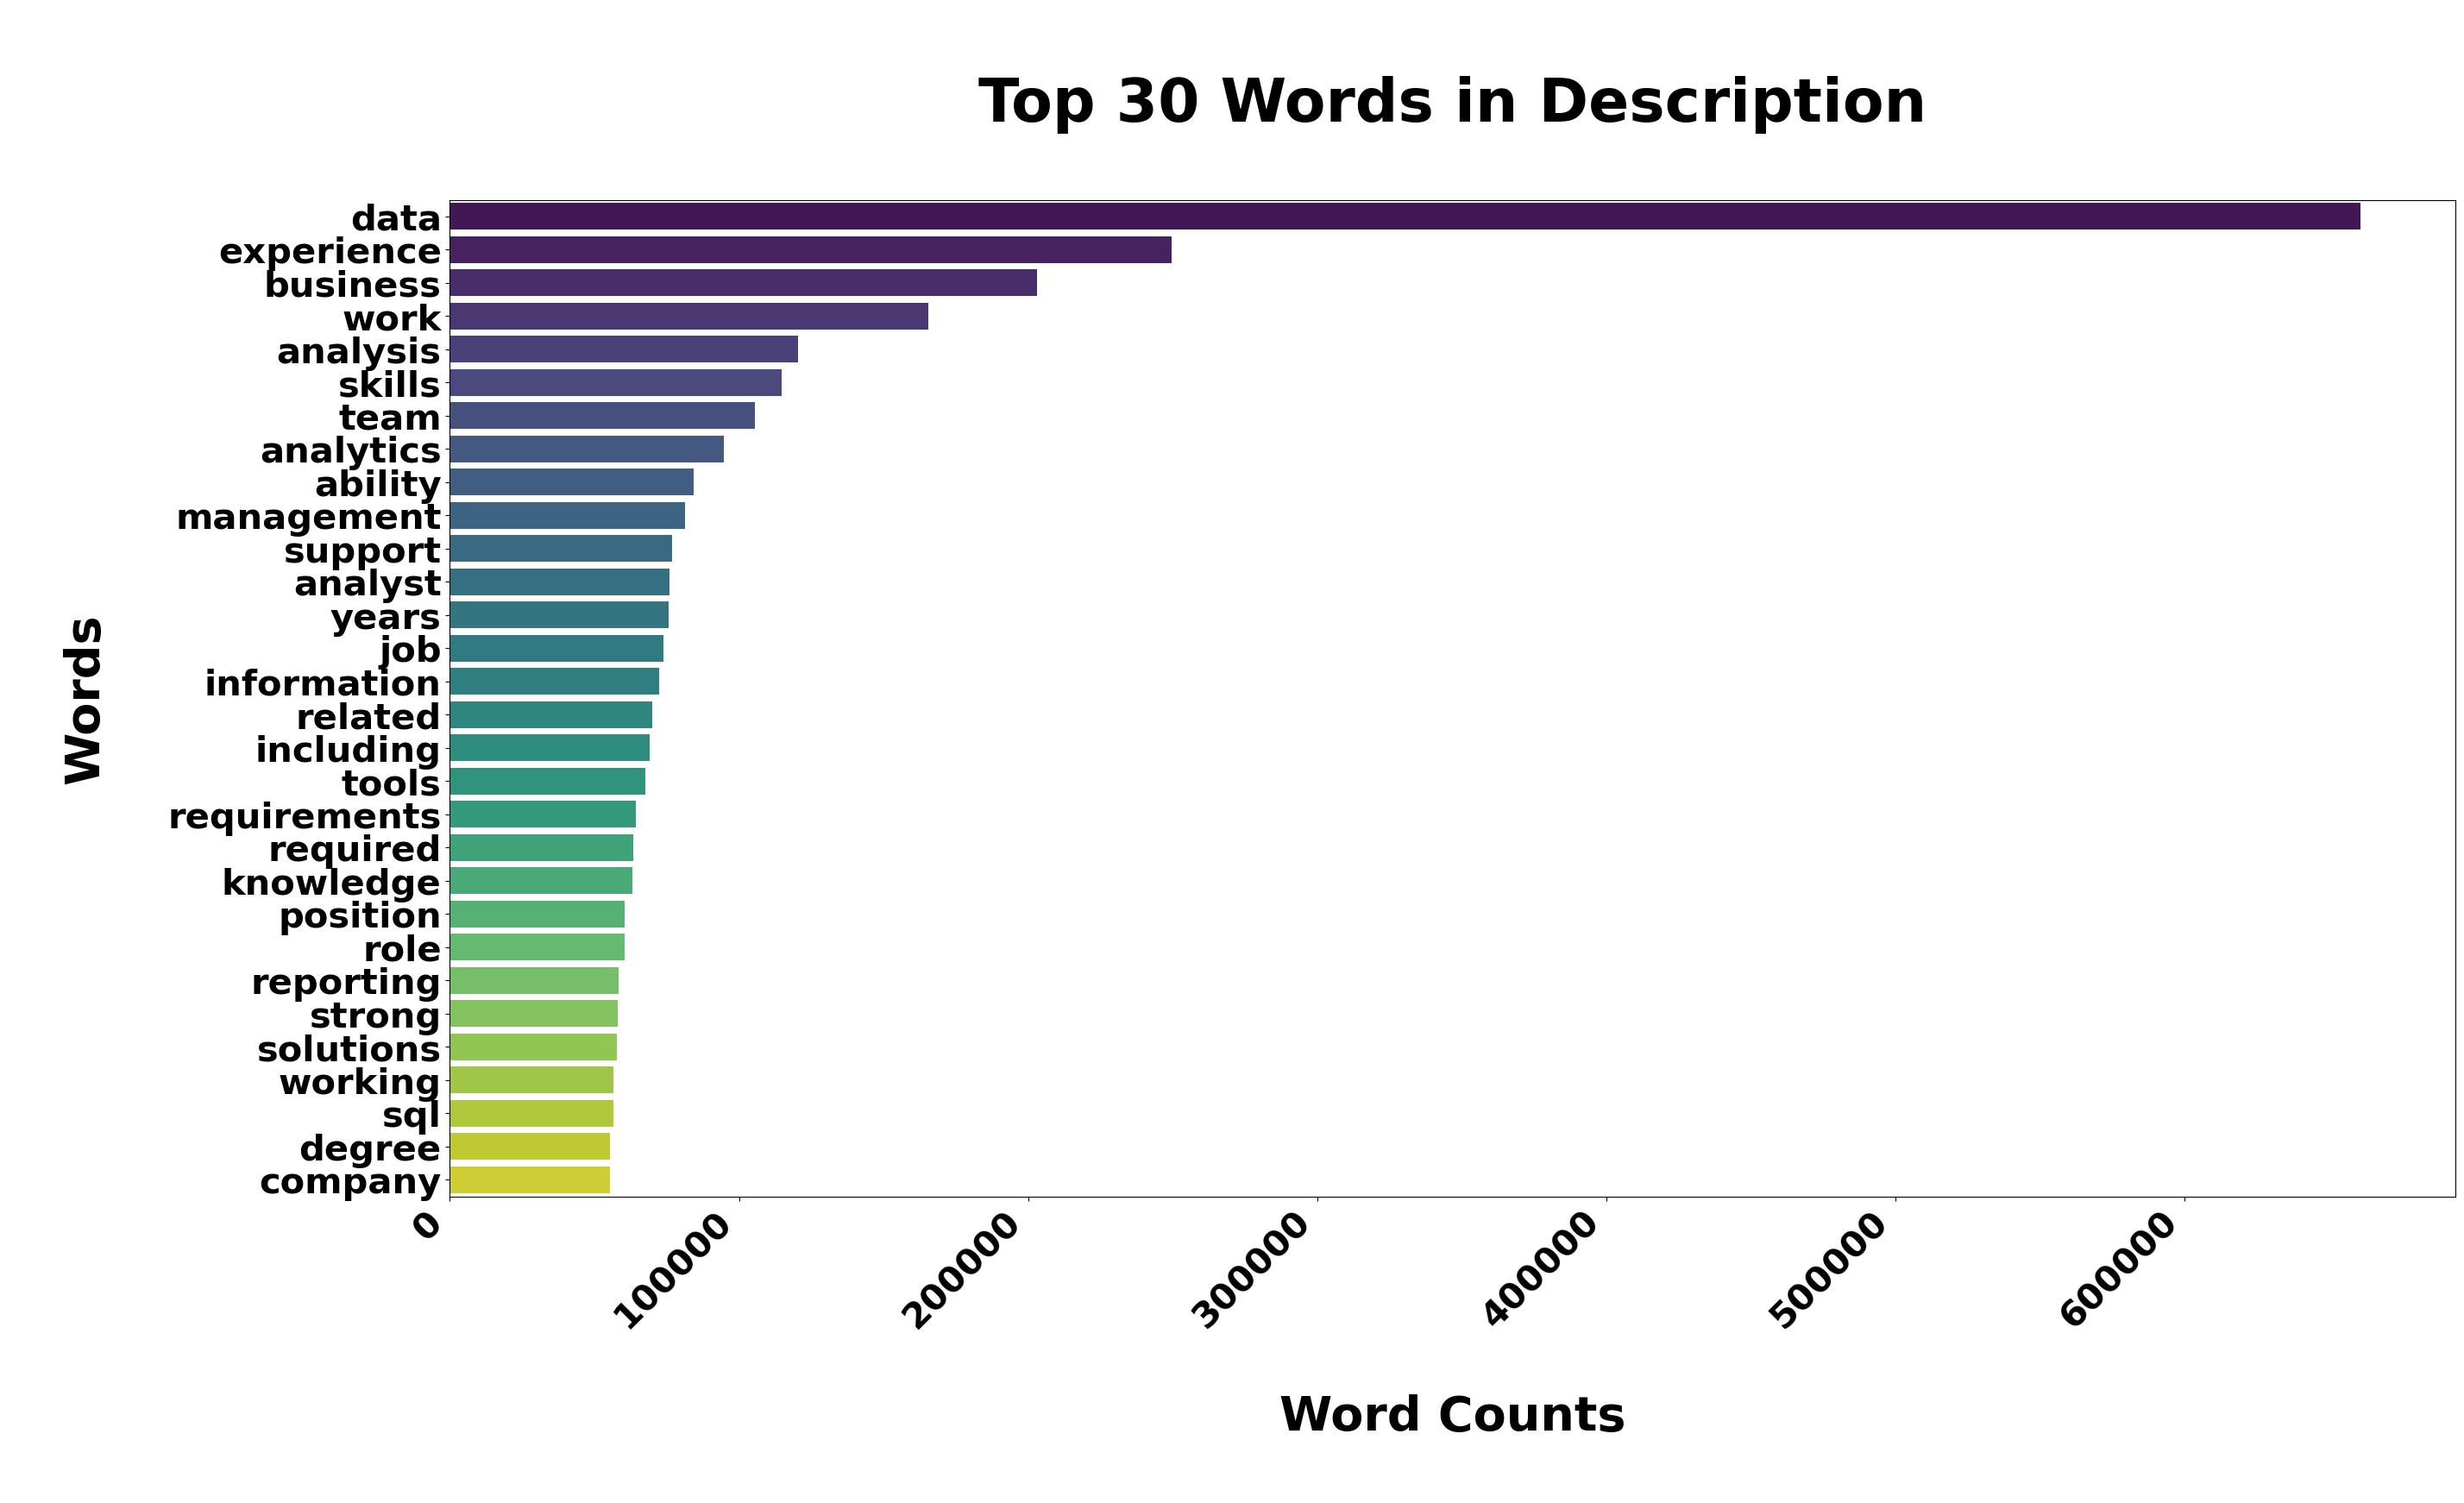

In [26]:
top_30_desc = desc_df.head(30)
plt.figure(figsize=(30, 15))

sns.barplot(data=top_30_desc, x='count', y='skill', hue='skill', palette='viridis')
plt.title('\nTop 30 Words in Description\n', weight='bold', fontsize=50)
plt.xlabel('\nWord Counts\n', weight='bold', fontsize=40)
plt.xticks(rotation=45, ha='right', weight='bold', fontsize=30)
plt.ylabel('\nWords\n', weight='bold', fontsize=40)
plt.yticks(weight='bold', fontsize=30)
plt.show()

The top 30 words in description after removing "stop words" such as "the", "and", etc. Data is number one, no surprise there, as with the rest of the words they all track. Some stand out words are management, sql, business, and strong.

In [27]:
import ast

# Convert string representations of lists into actual Python lists
df['description_tokens'] = df['description_tokens'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else []
)


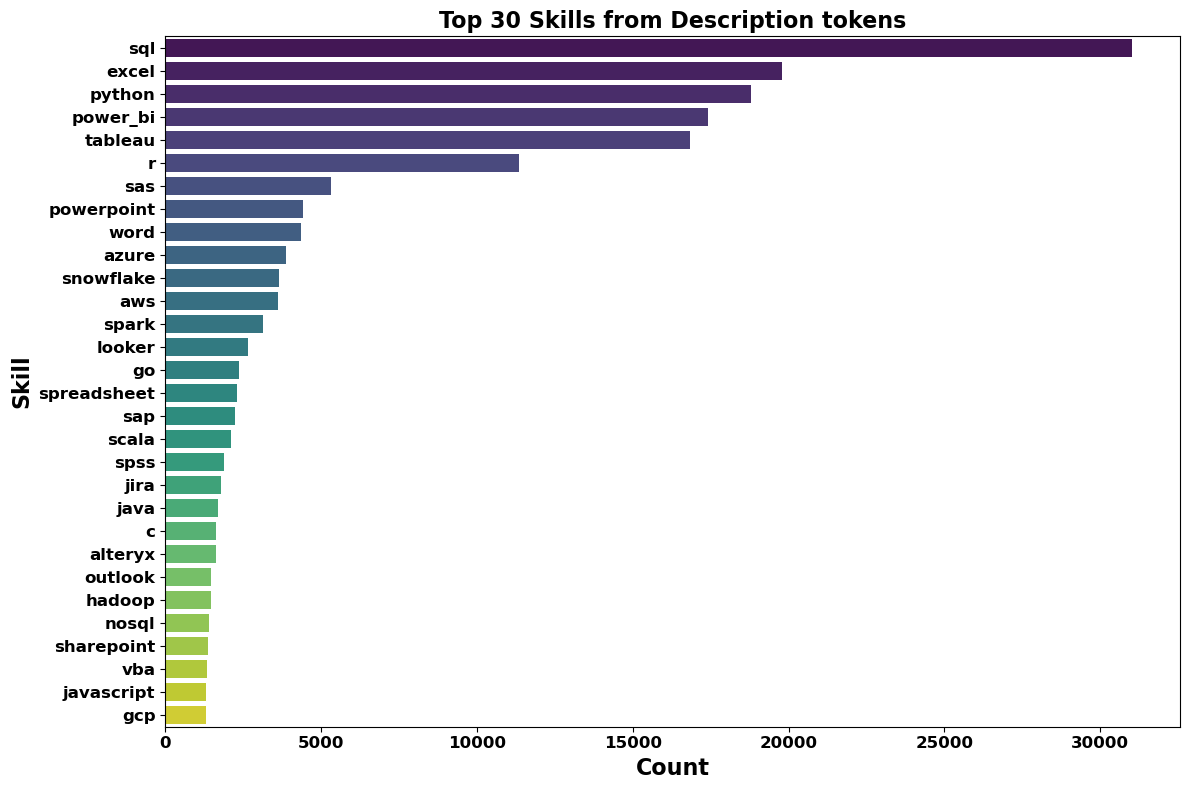

In [28]:
all_tokens = [token for tokens in df['description_tokens'] if isinstance(tokens, list) for token in tokens]
token_counts = Counter(all_tokens)

# DataFrame
skills_df = pd.DataFrame(token_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=skills_df.head(30), x='count', y='skill', hue='skill', palette='viridis',legend=False)
plt.title('Top 30 Skills from Description tokens', fontsize=16, weight='bold')
plt.xlabel('Count', weight='bold', fontsize=16)
plt.xticks(fontsize=12, weight='bold')
plt.ylabel('Skill', weight='bold', fontsize=16)
plt.yticks(fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


In [29]:
def normalize_location(location):
    if pd.isnull(location):
        return location

    location = location.strip().lower()

    # Match common variants of New York City
    if re.search(r'\b(new\s*york(,\s*new\s*york)?|nyc|new\s*york\s*city|manhattan)\b', location):
        return 'New York, NY'

    return location.title()

df['location'] = df['location'].apply(normalize_location)


In [30]:
df['location'].value_counts().head(50)

location
Anywhere                 27982
United States            15558
Oklahoma City, Ok         1437
Kansas City, Mo           1413
Denver, Co                1062
Jefferson City, Mo         921
Bentonville, Ar            598
Colorado Springs, Co       512
Tulsa, Ok                  510
Wichita, Ks                486
Topeka, Ks                 449
Overland Park, Ks          432
Aurora, Co                 346
Springfield, Mo            333
Columbia, Mo               309
Englewood, Co              254
Springdale, Ar             220
Kansas City, Ks            208
California, Mo             193
Rogers, Ar                 193
Boulder, Co                173
Missouri                   172
Fayetteville, Ar           165
Lenexa, Ks                 156
Santa Fe, Nm               141
Greenwood Village, Co      141
Edmond, Ok                 139
Olathe, Ks                 132
Missouri City, Mo          108
Bella Vista, Ar            101
Grand Junction, Co         100
Dearing, Ks                 97

NYC and any variations are still not showing up in the top 50 after normalizing it. This may be because NY based location may have been included in United States or anywhere. This could also because these locations might be based on the companies headquarters. There is also a chance that this data was obtained from a biased set that overrepresents the midwest.

# Bivariate

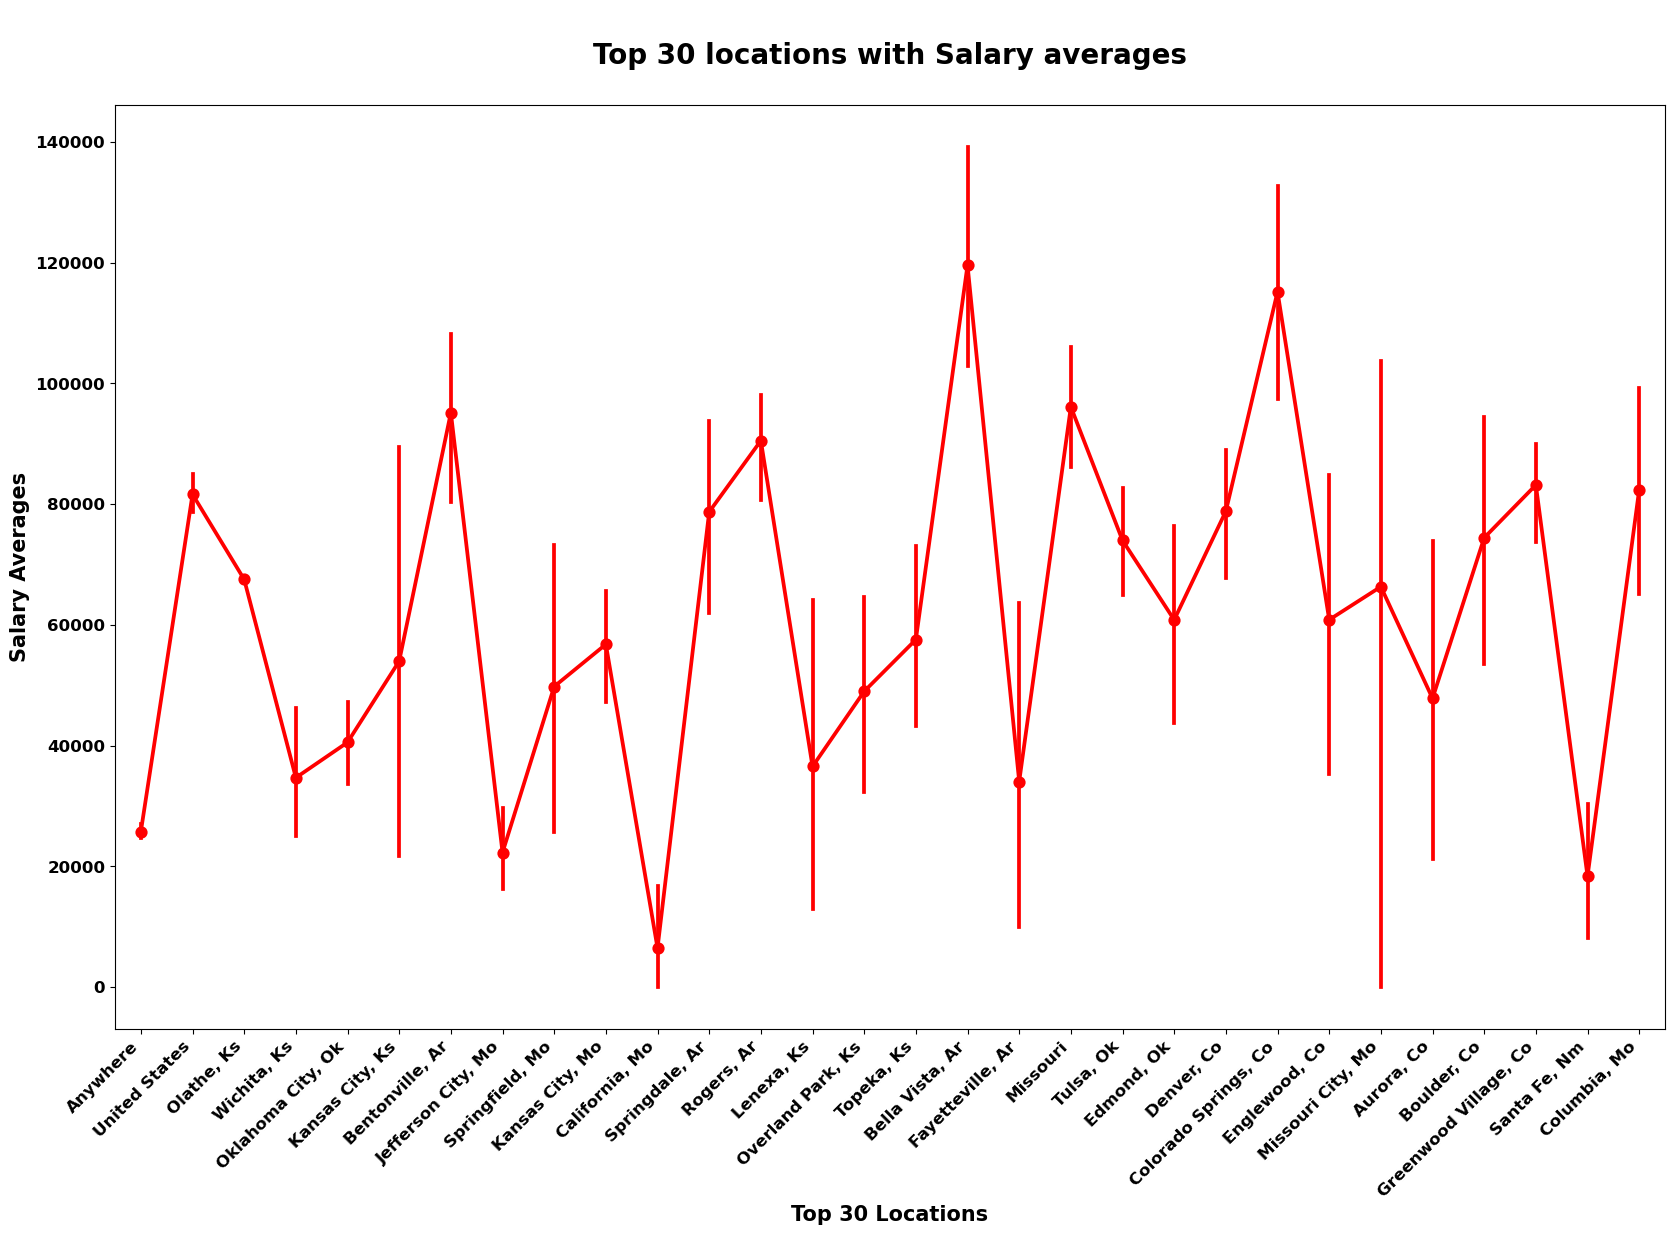

In [31]:
top10_slrXavg = df['location'].value_counts().head(30).index
df_top10_locs = df[df['location'].isin(top10_slrXavg)]

plt.figure(figsize=(20, 12))
sns.pointplot(data=df_top10_locs, x='location', y='salary_avg', color='red')
plt.title('\nTop 30 locations with Salary averages\n', weight='bold', fontsize=20)
plt.xlabel('Top 30 Locations', weight='bold', fontsize=15)
plt.xticks(ha='right', rotation=45, fontsize=12, weight='bold')
plt.ylabel('Salary Averages', weight='bold', fontsize=15)
plt.yticks(fontsize=12, weight='bold')
plt.show()

Bella Vista, AR stands out due to outliers. Anywhere gets dragged down to just over 20k. Many cities in CO are paying well due to the state becoimg a tech hub, mainly Denver.

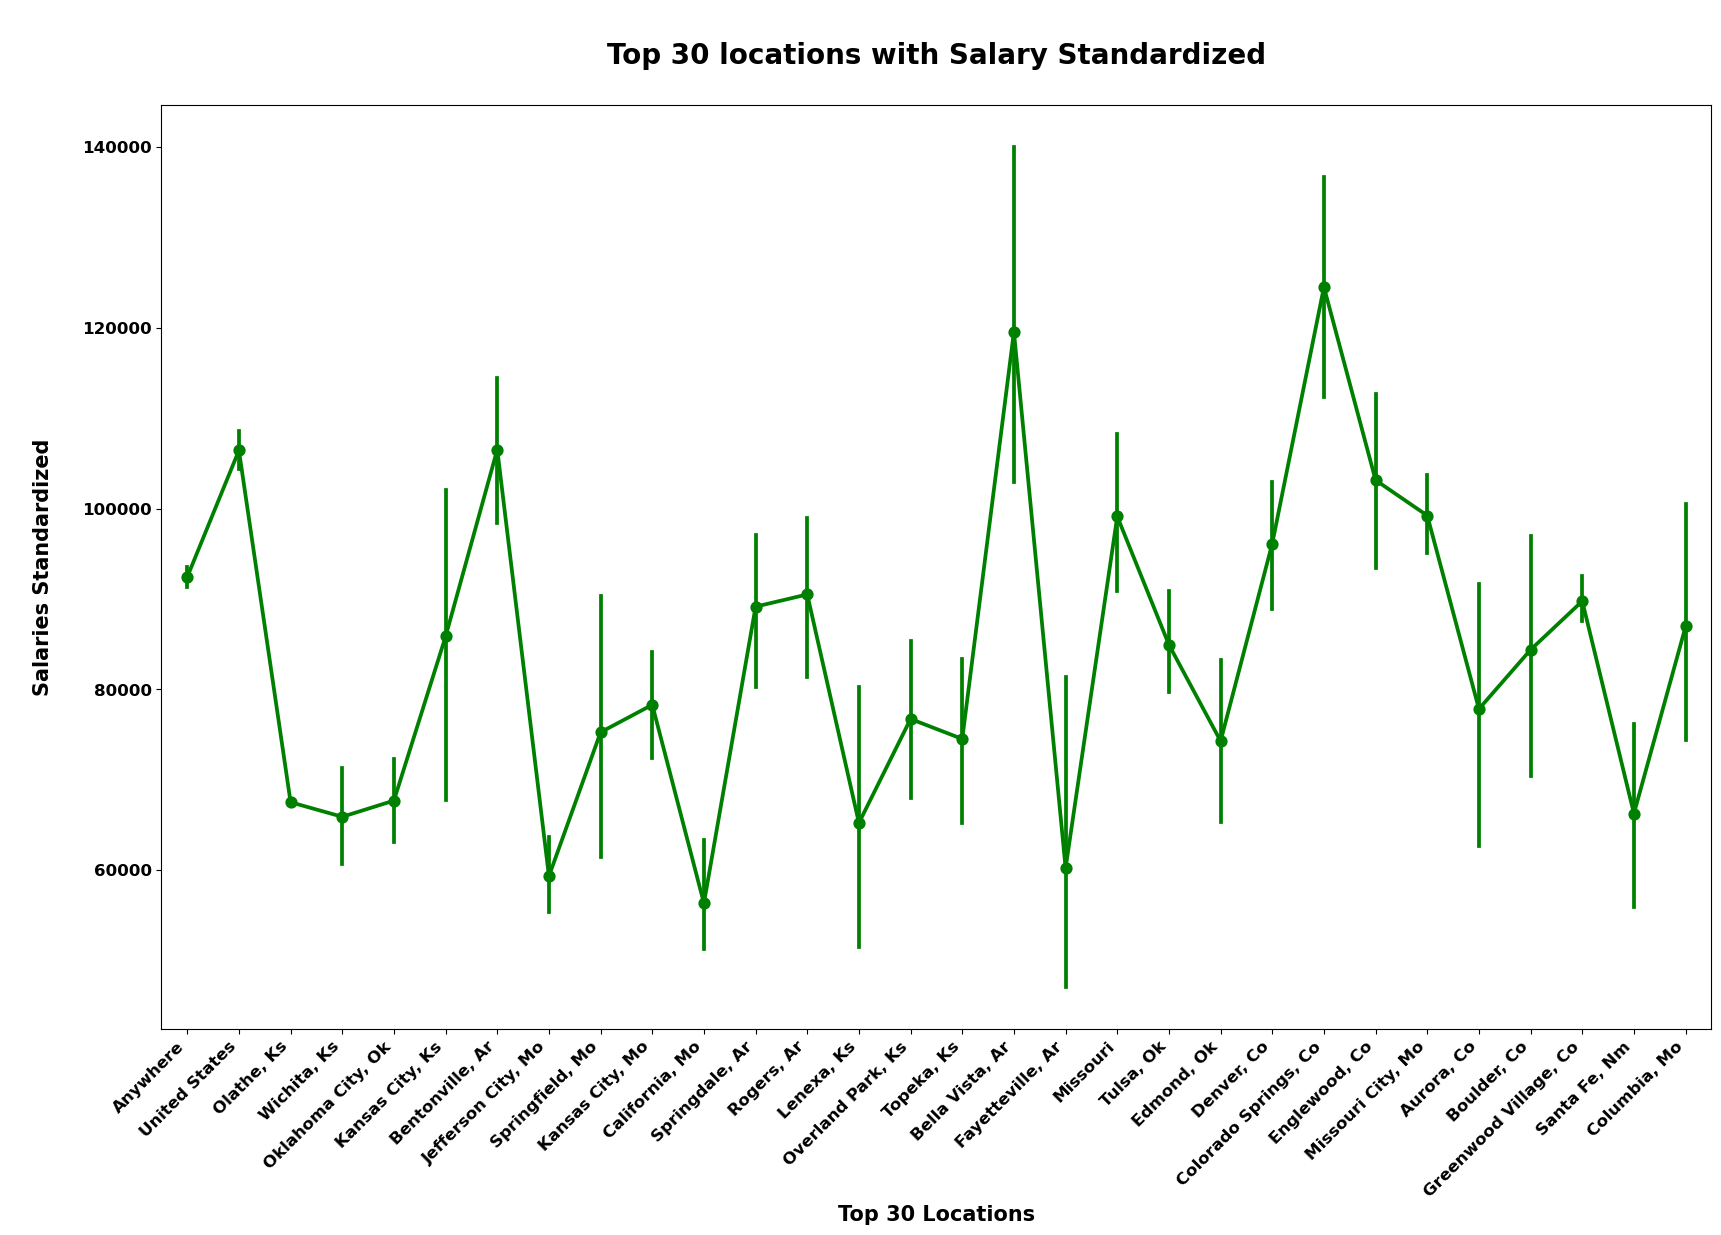

In [32]:
top10_locXstd = df['location'].value_counts().head(30).index
df_top10_locs = df[df['location'].isin(top10_locXstd)]

plt.figure(figsize=(20, 12))
sns.pointplot(data=df_top10_locs, x='location', y='salary_standardized', color='green')
plt.title('\nTop 30 locations with Salary Standardized\n', weight='bold', fontsize=20)
plt.xlabel('Top 30 Locations', weight='bold', fontsize=15)
plt.xticks(ha='right', rotation=45, fontsize=12, weight='bold')
plt.ylabel('\nSalaries Standardized\n', weight='bold', fontsize=15)
plt.yticks(fontsize=12, weight='bold')
plt.show()

This graph is extremely similar to the last, but notably anywhere has now moved up to over 90k from being around 20k in the average graph.

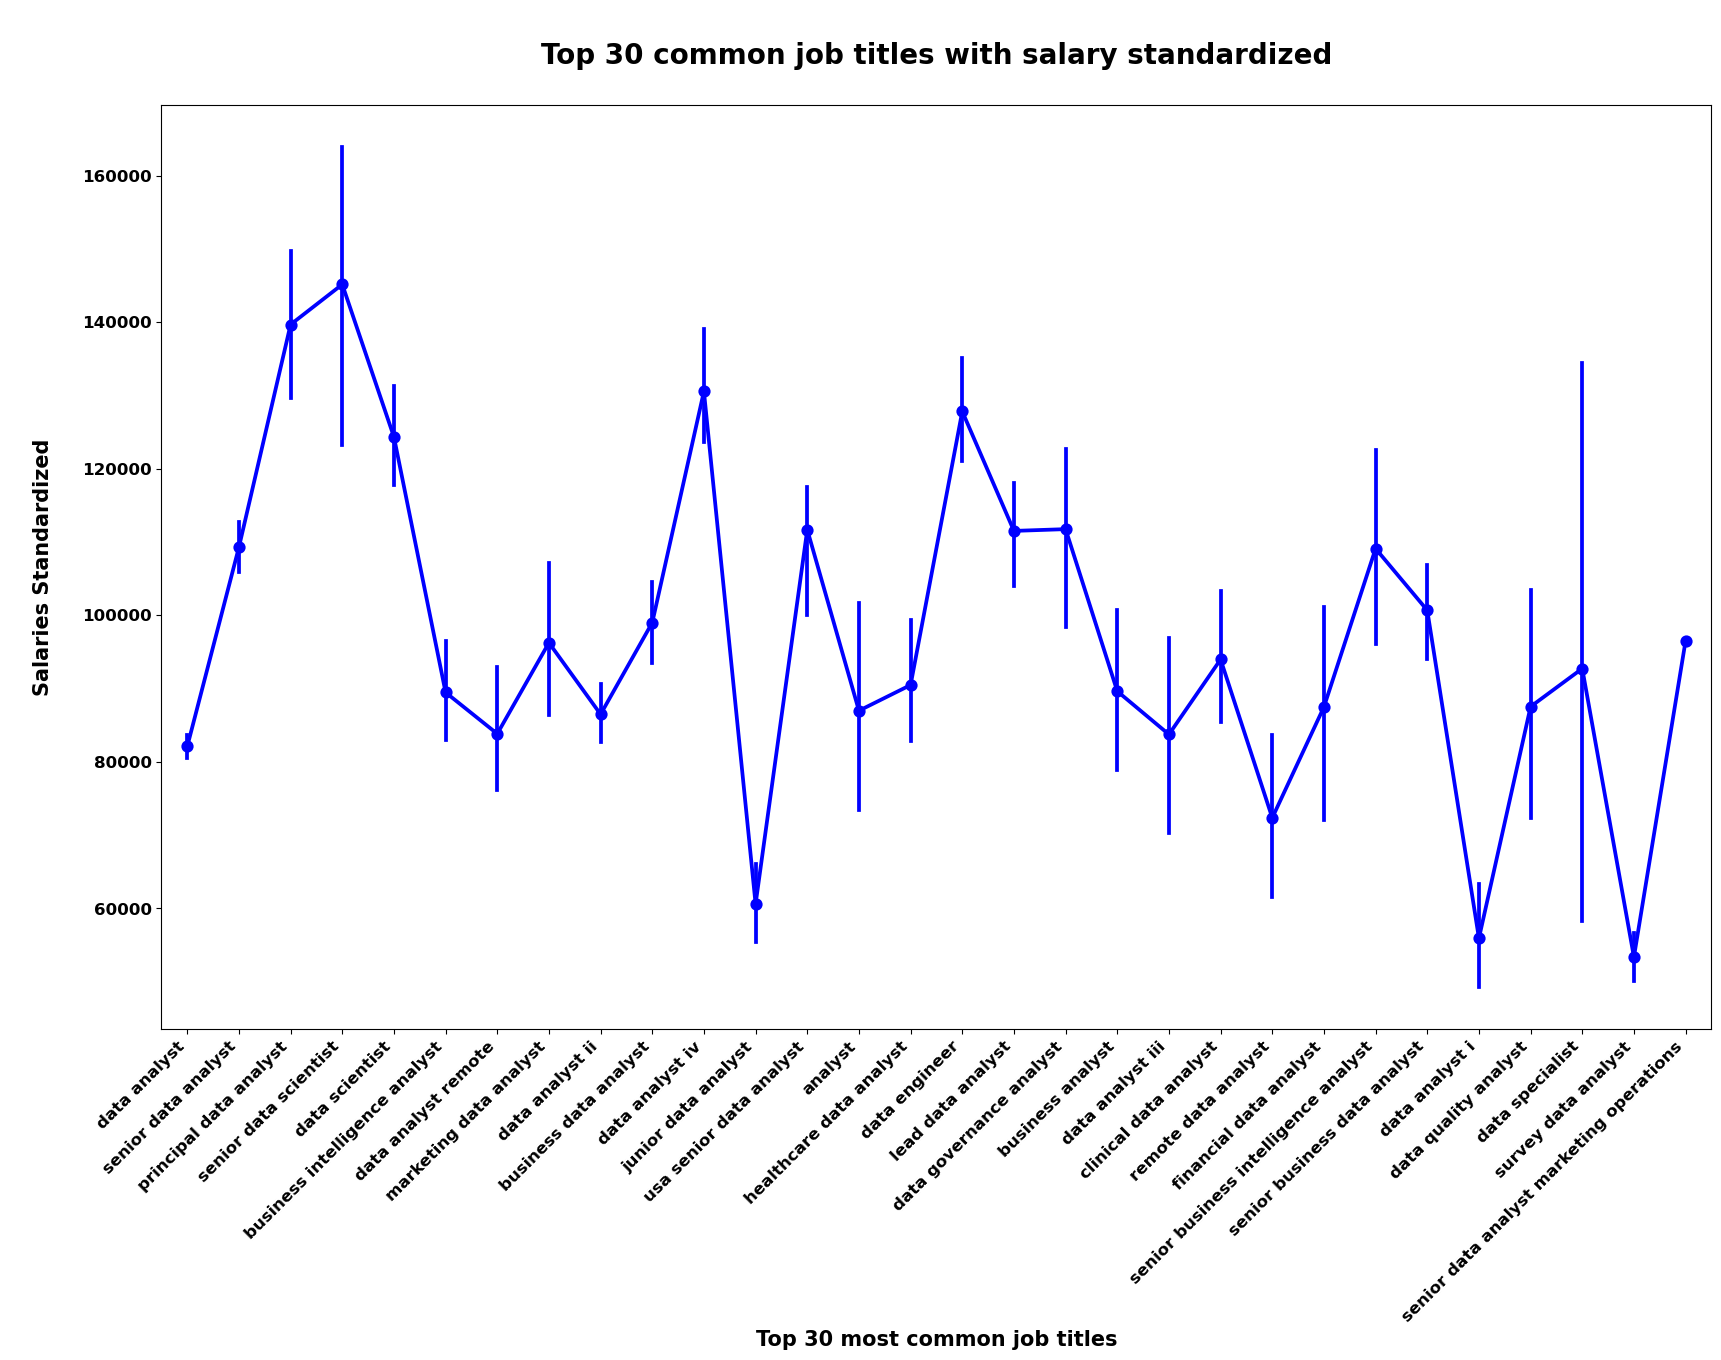

In [33]:
top10_locXstd = df['title'].value_counts().head(30).index
df_top10_locs = df[df['title'].isin(top10_locXstd)]

plt.figure(figsize=(20, 12))
sns.pointplot(data=df_top10_locs, x='title', y='salary_standardized', color='blue')
plt.title('\nTop 30 common job titles with salary standardized\n', weight='bold', fontsize=20)
plt.xlabel('Top 30 most common job titles', weight='bold', fontsize=15)
plt.xticks(ha='right', rotation=45, fontsize=12, weight='bold')
plt.ylabel('\nSalaries Standardized\n', weight='bold', fontsize=15)
plt.yticks(fontsize=12, weight='bold')
plt.show()

Data analyst the by far most common title, sits at just over 80k. The more senior positions pay more and the juniors pay less as it would be expected. Data specialist has a very wide range as it sounds like a very vague title.

# Multivariate

In [34]:
df = df.drop(columns=['index', 'Unnamed: 0', 'commute_time'])

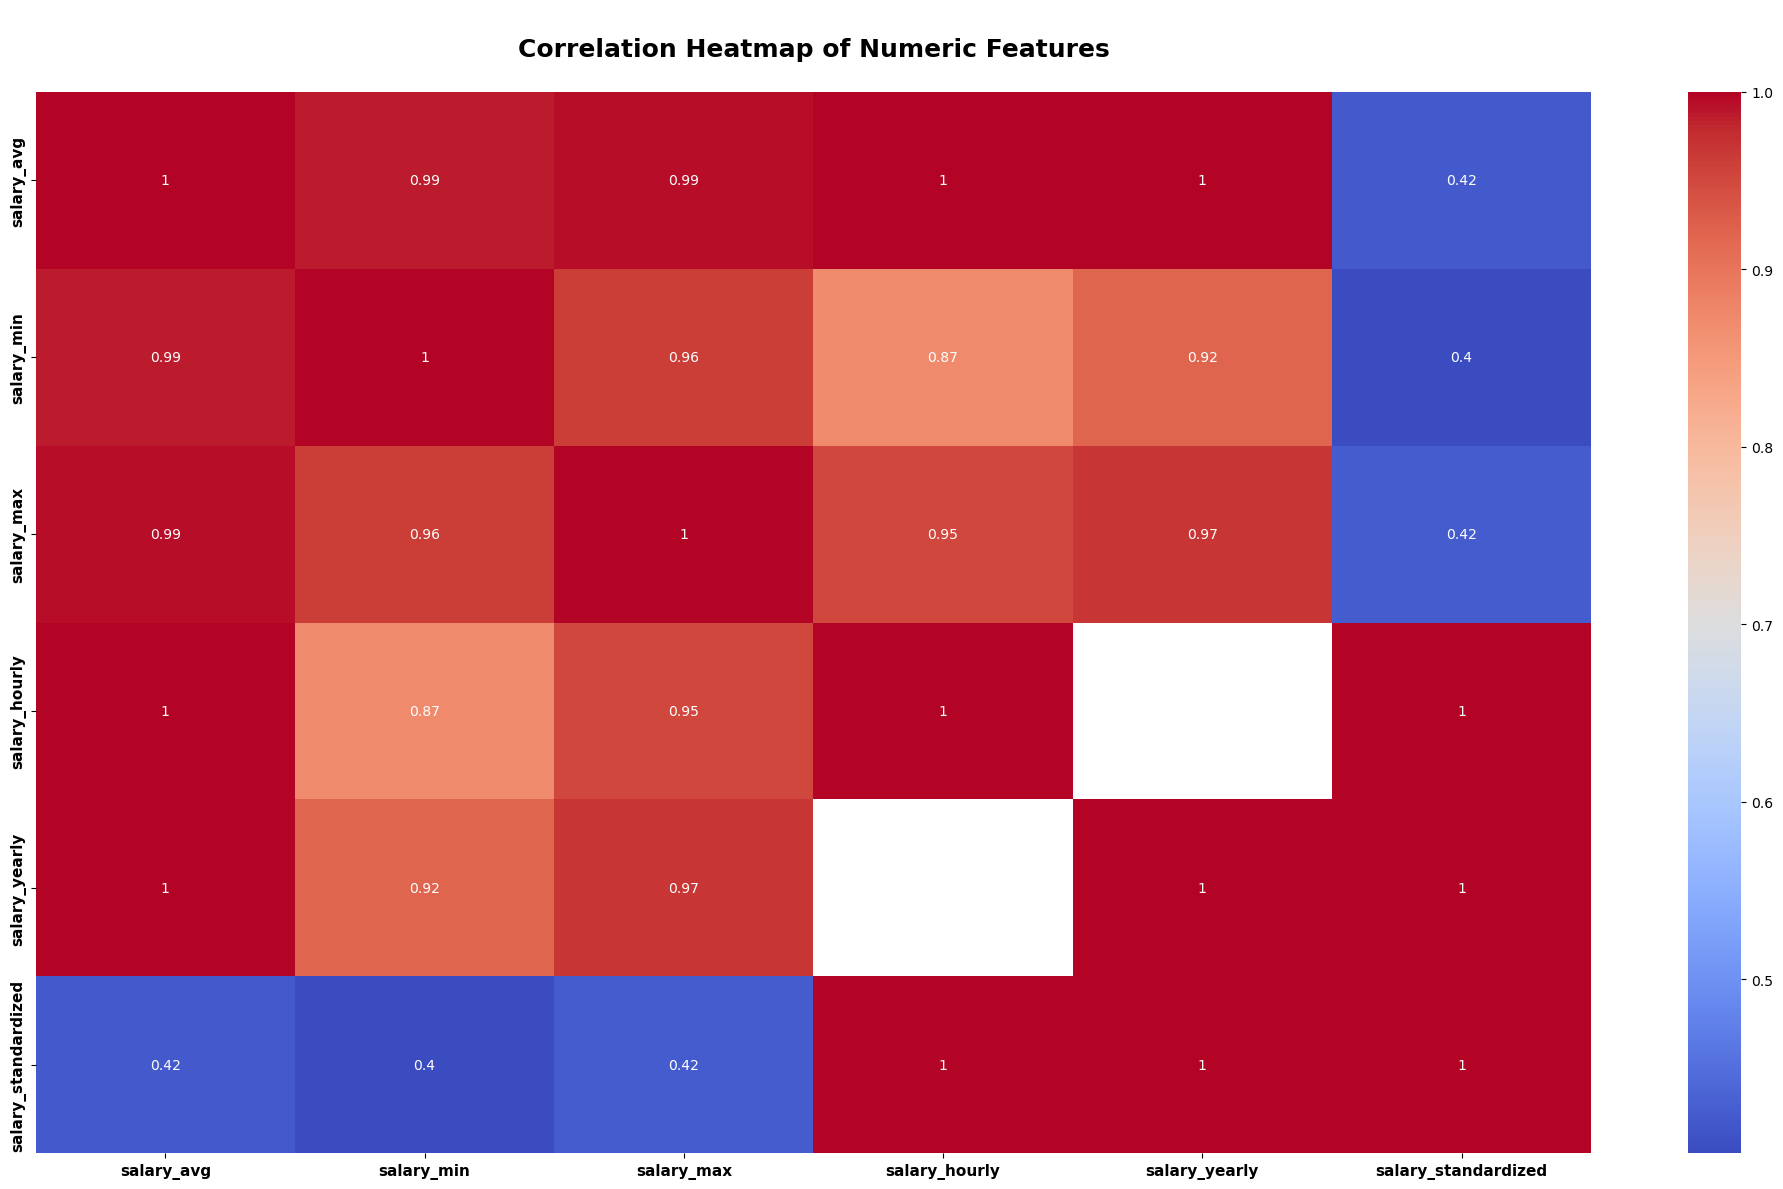

In [35]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('\nCorrelation Heatmap of Numeric Features\n', fontsize=18, weight='bold')
plt.xticks(fontsize=11, weight='bold')
plt.yticks(fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

Unnamed: 0 and commute_time had to be dropped for this since they were giving blank spaces and they are going to be dropped anyways since their data is useless. Index is also pointless and it was dropped as well even though it was showing some negative correlations.

We see many one to one correlations between features and some .99 thru .92 corrrelations.

salary_hourly and salary_yearly give a blank white space when crossing, because there are no shared rows were both are not null.